In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
PATH    = "right_iliac"
CSV     = "/media/marsdenlab/Data1/UQ/0110/csv/"+PATH+".csv"
FIG_DIR = "/media/marsdenlab/Data1/UQ/0110/figures/"+PATH

io.rmdir(FIG_DIR)
io.mkdir(FIG_DIR)

quants  = [
"area",
"radius_actual",
"pressure_00400_0",
"velocity_00400_3",
"vWSS_00400_3_boundary"
]

labels = [
"area",
"radius",
"pressure",
"velocity",
"vWSS"
]

df = pd.read_csv(CSV)

print(df.columns)

Index(['Unnamed: 0', 'area', 'generation', 'length', 'mesh', 'model', 'nx',
       'ny', 'nz', 'point', 'pressure_00400_0', 'pressure_00400_0_boundary',
       'radius_actual', 'radius_supplied', 'vWSS_00400_0',
       'vWSS_00400_0_boundary', 'vWSS_00400_1', 'vWSS_00400_1_boundary',
       'vWSS_00400_2', 'vWSS_00400_2_boundary', 'vWSS_00400_3',
       'vWSS_00400_3_boundary', 'velocity_00400_0',
       'velocity_00400_0_boundary', 'velocity_00400_1',
       'velocity_00400_1_boundary', 'velocity_00400_2',
       'velocity_00400_2_boundary', 'velocity_00400_3',
       'velocity_00400_3_boundary', 'x', 'y', 'z'],
      dtype='object')


In [3]:
generations = [1,2,3,4]
meshes = ['coarse','medium','fine']
for g in generations:
    d1 = FIG_DIR+'/'+str(g)
    io.rmdir(d1)
    io.mkdir(d1)
    
    for m in meshes:
        d2 = d1+'/'+m    
        io.mkdir(d2)

/home/marsdenlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


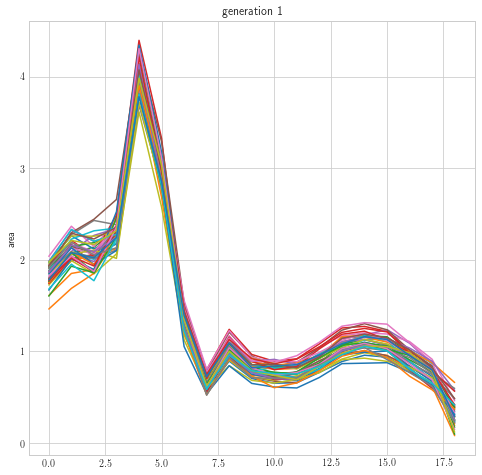

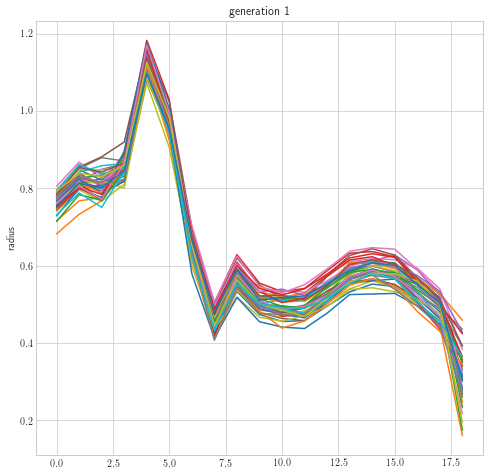

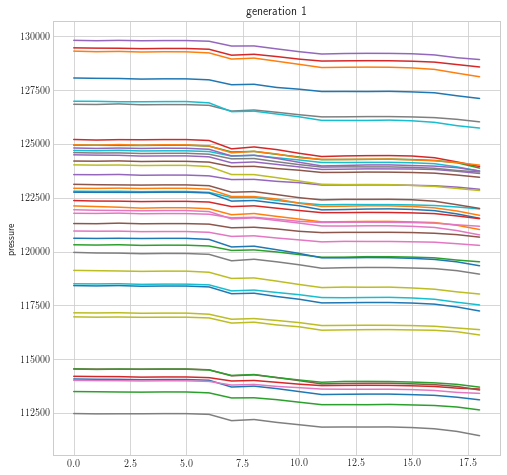

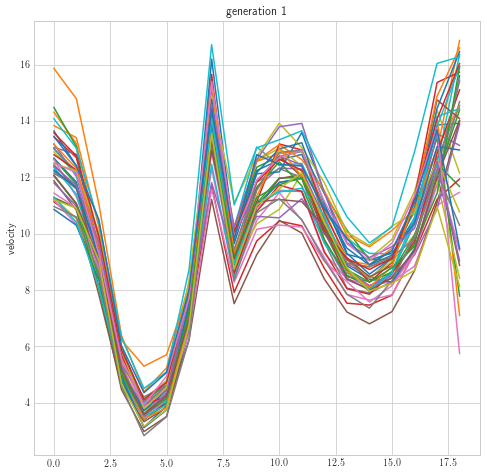

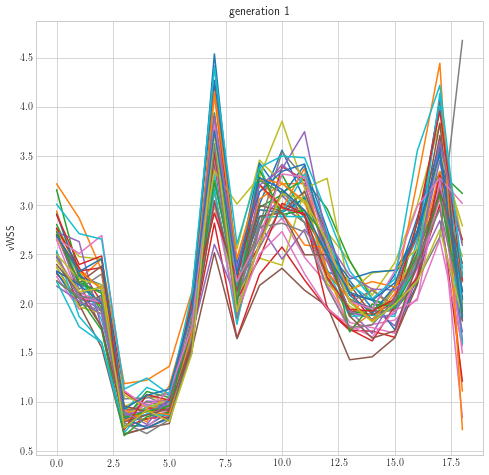

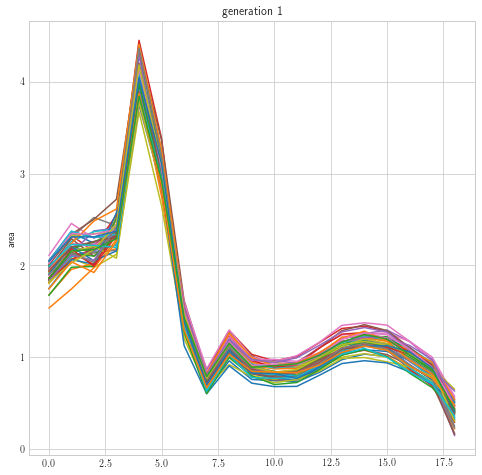

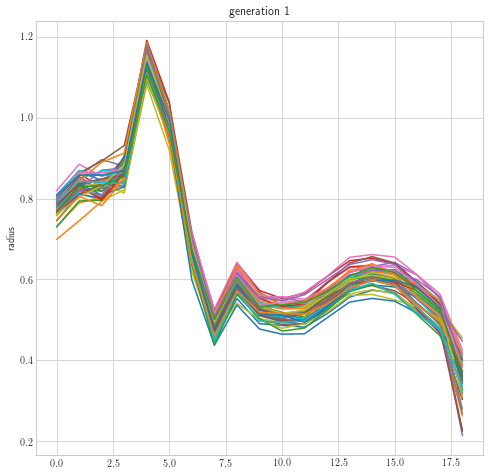

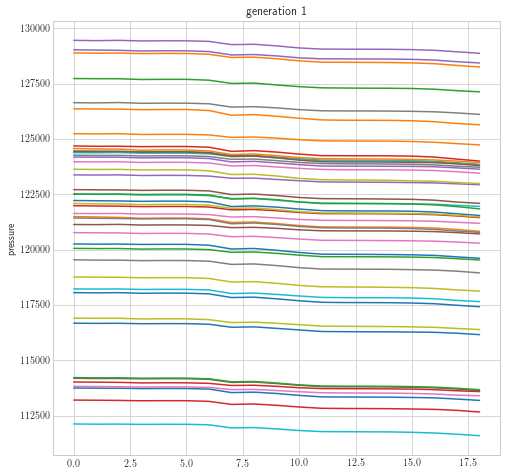

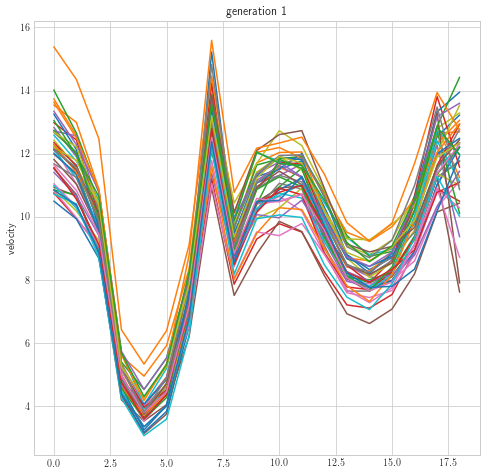

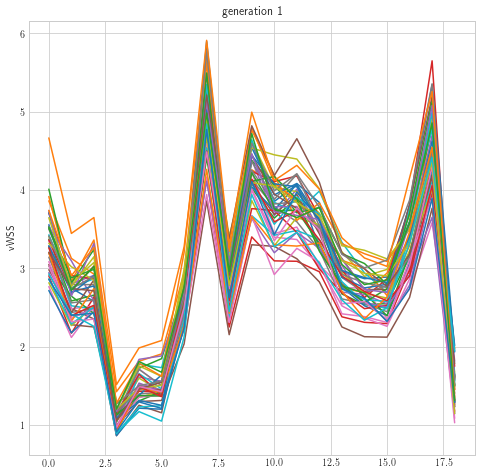

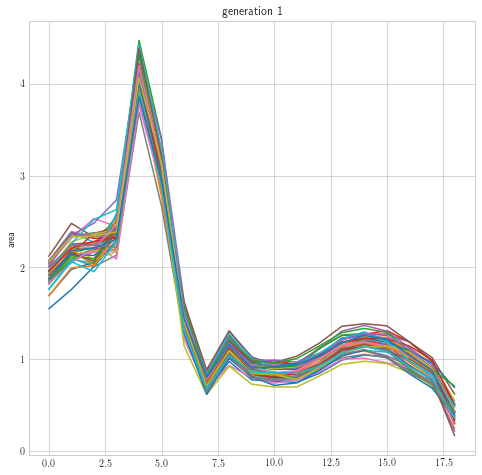

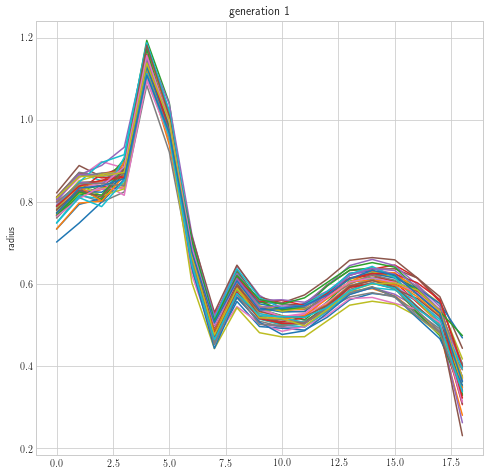

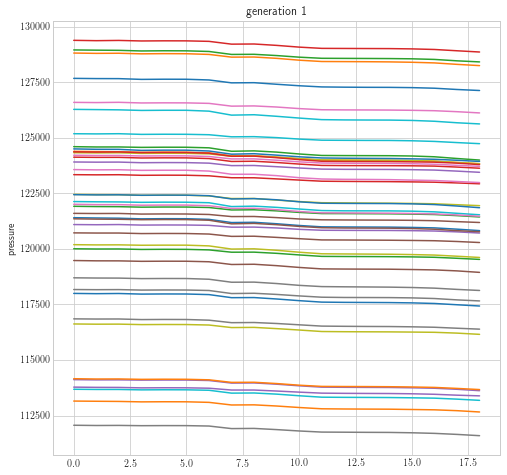

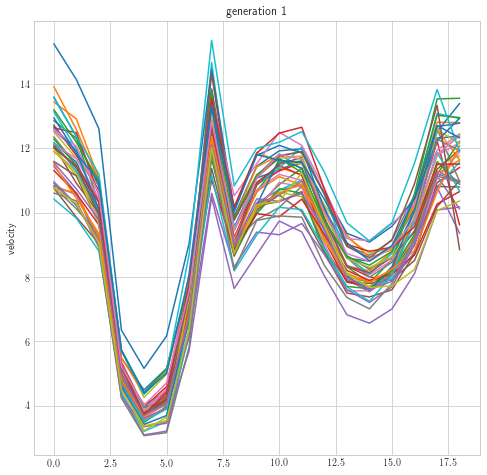

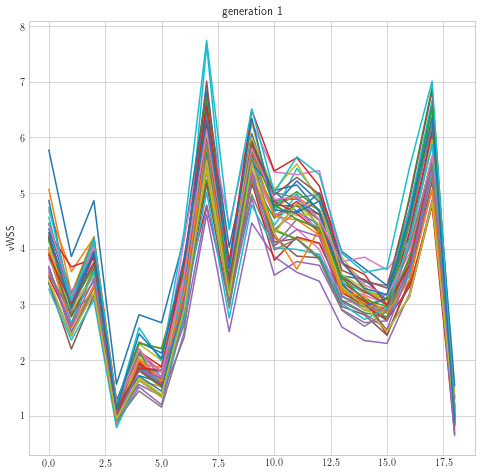

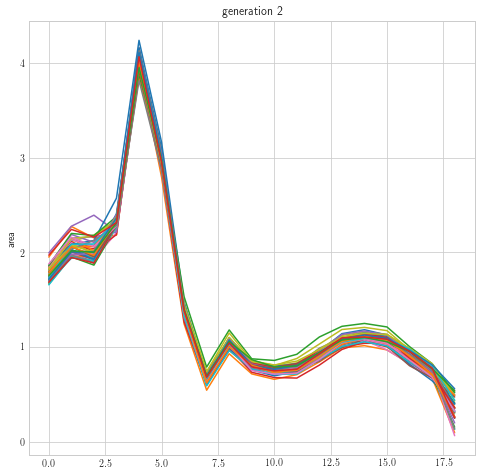

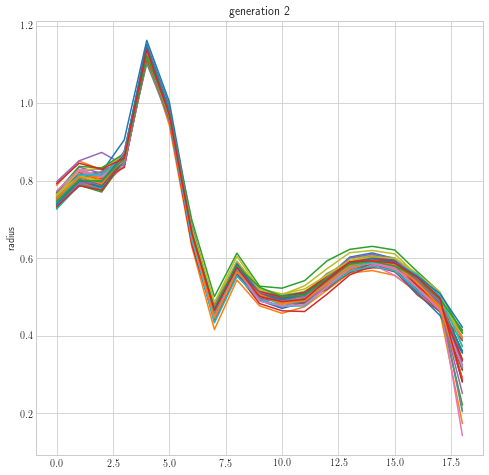

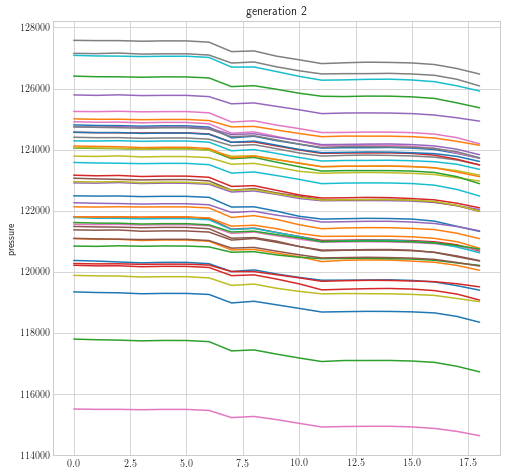

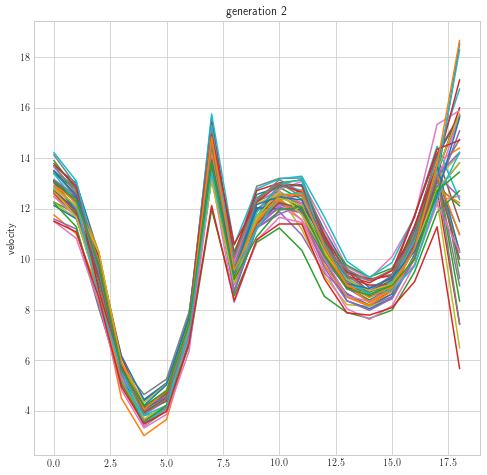

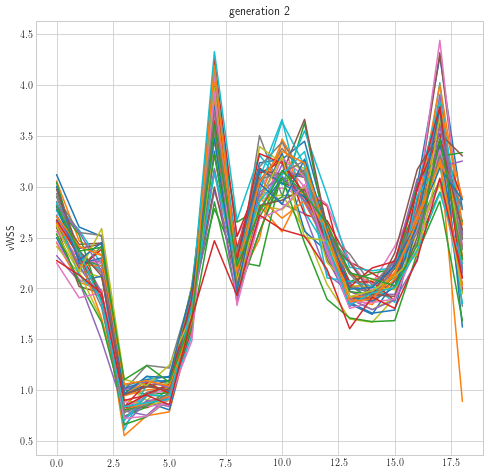

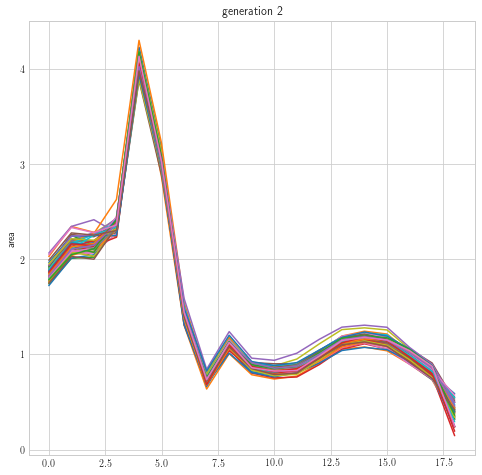

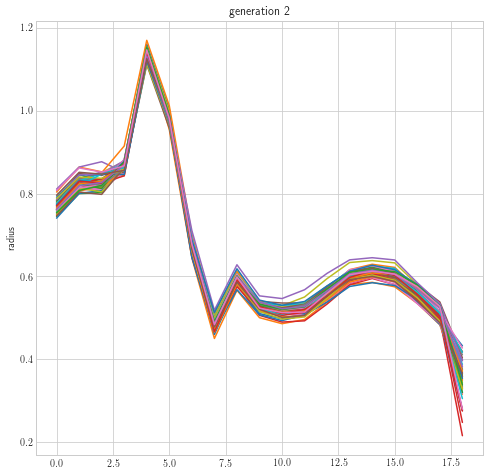

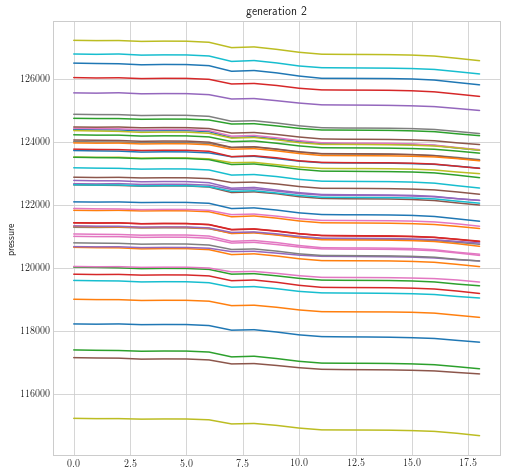

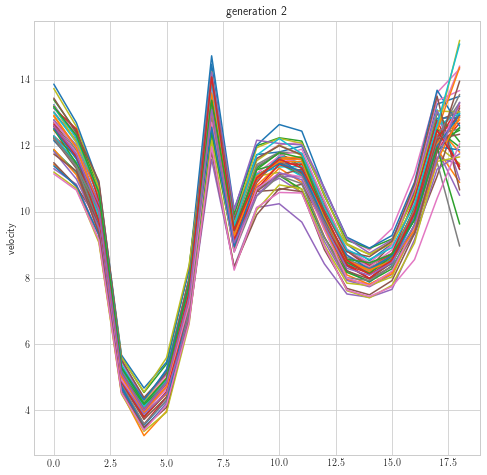

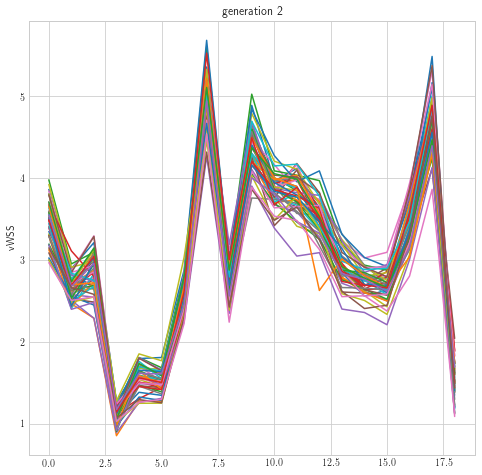

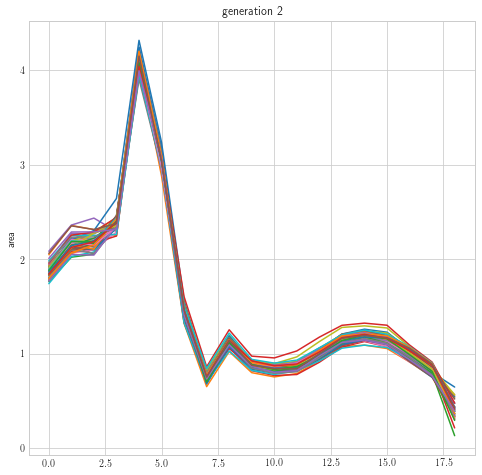

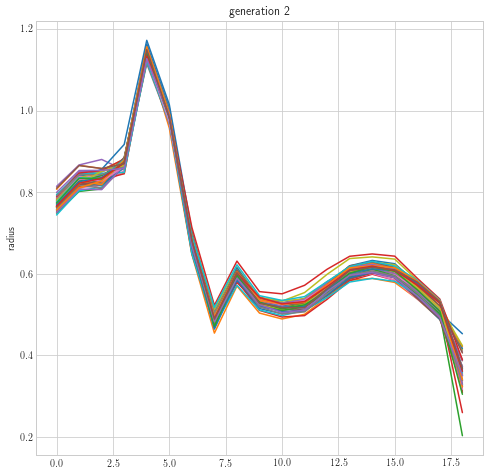

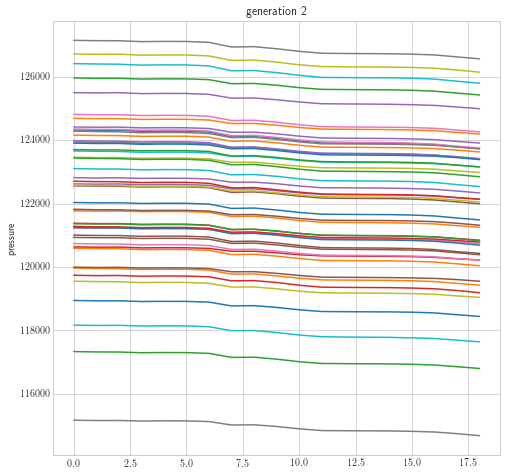

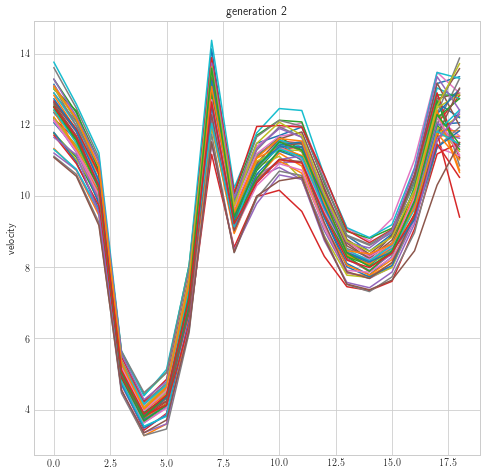

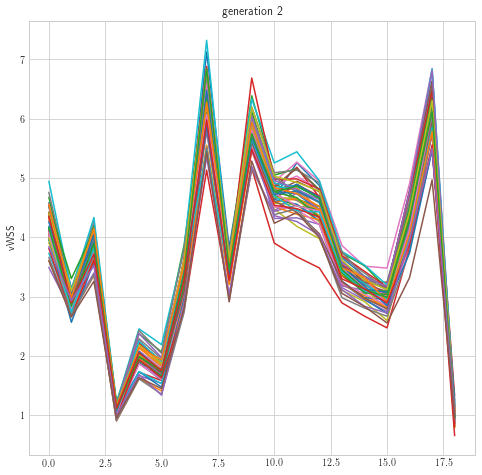

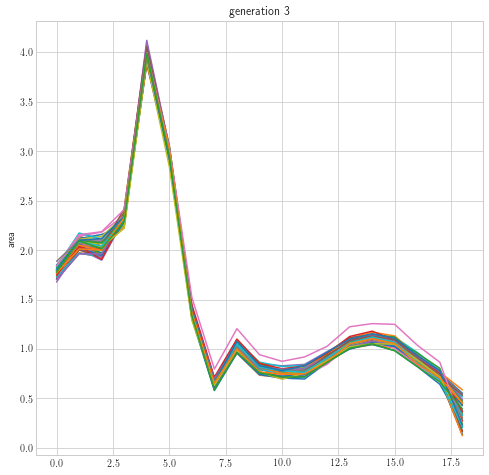

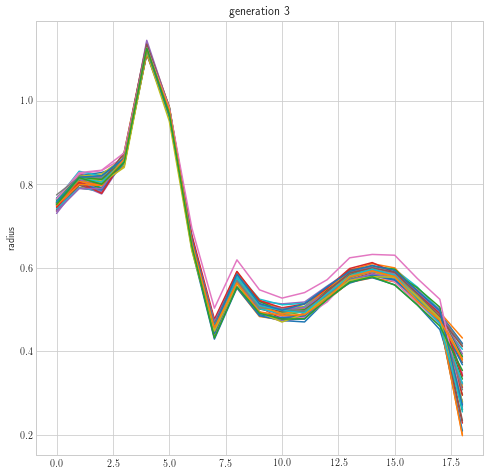

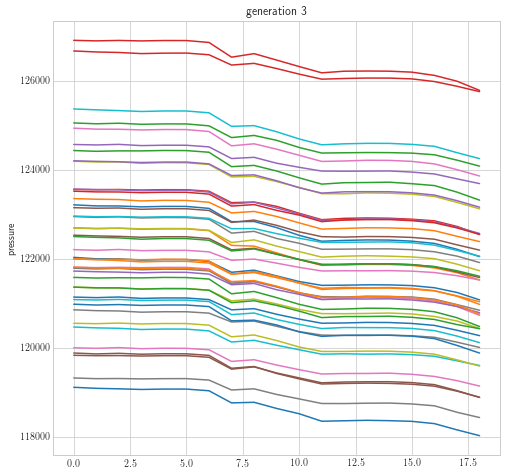

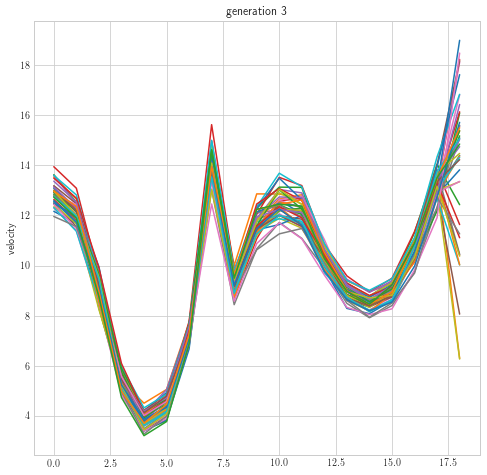

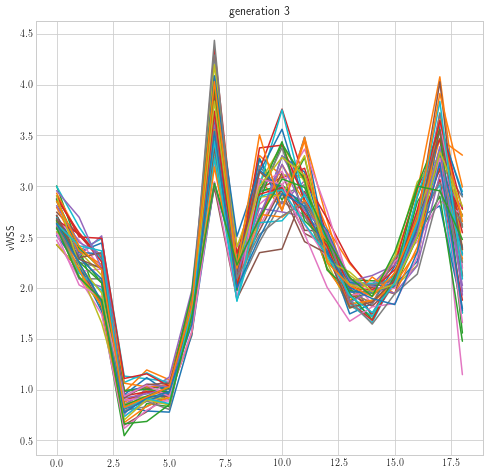

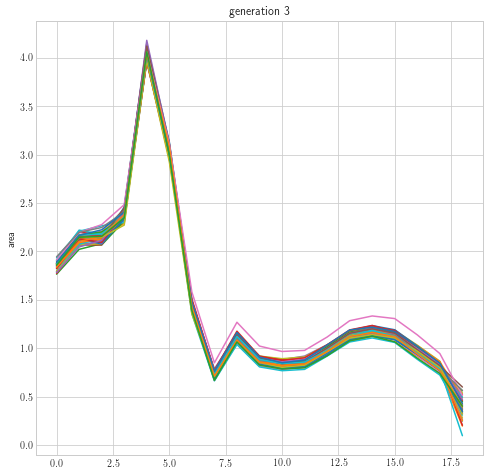

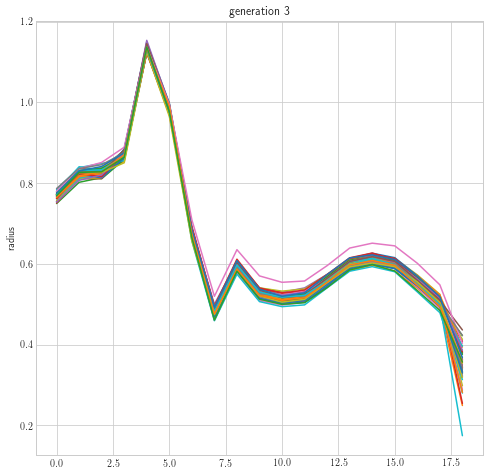

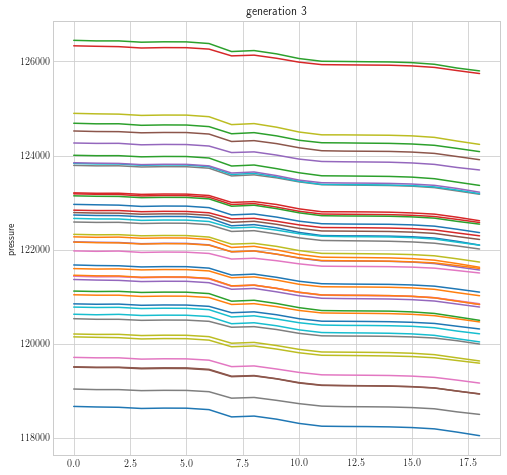

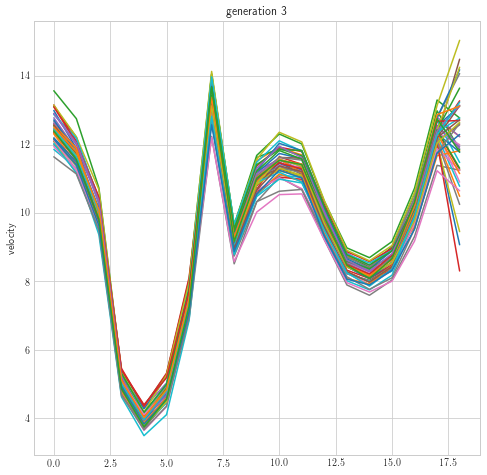

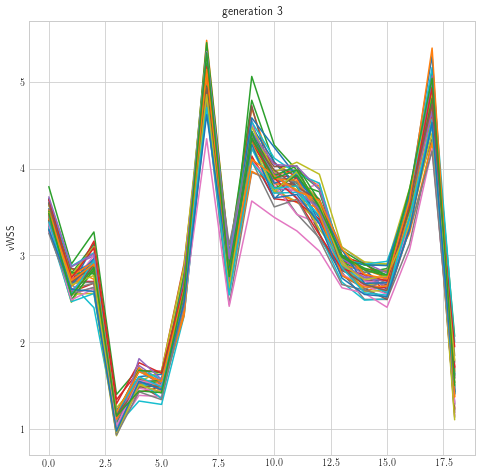

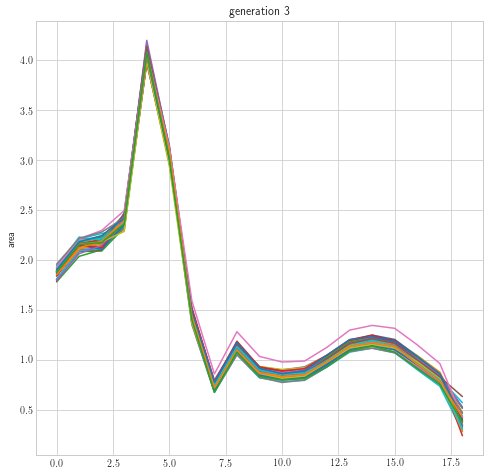

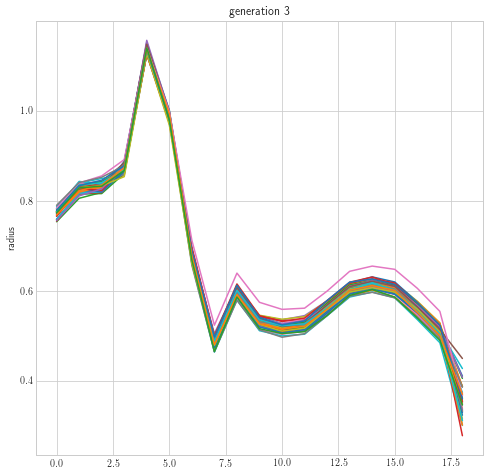

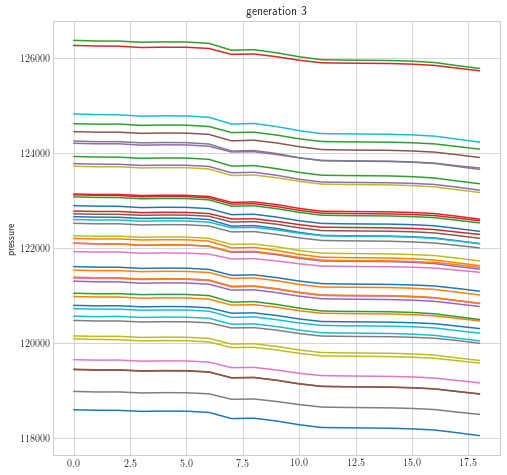

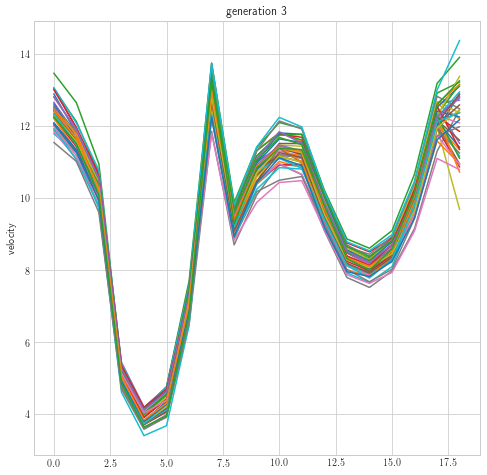

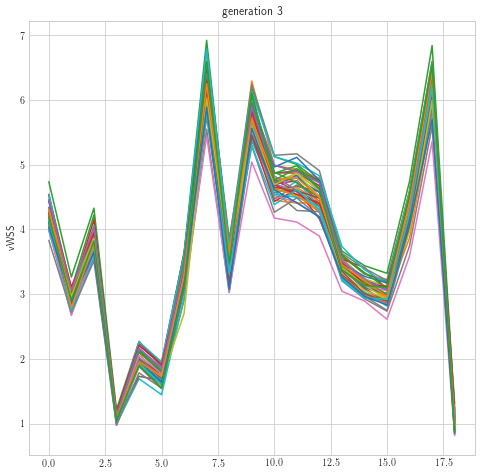

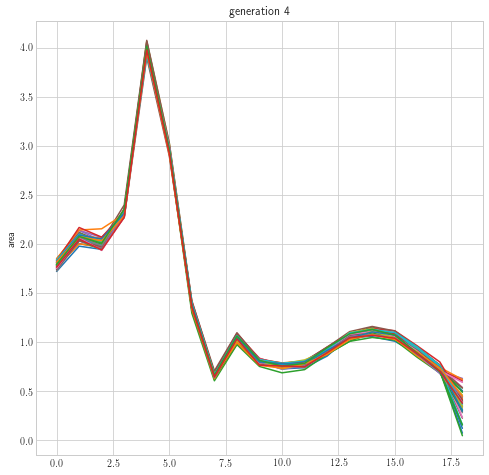

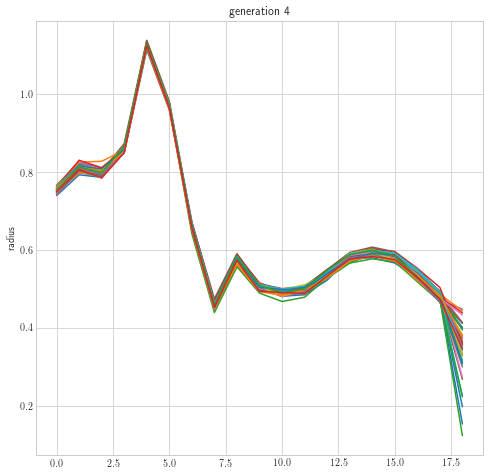

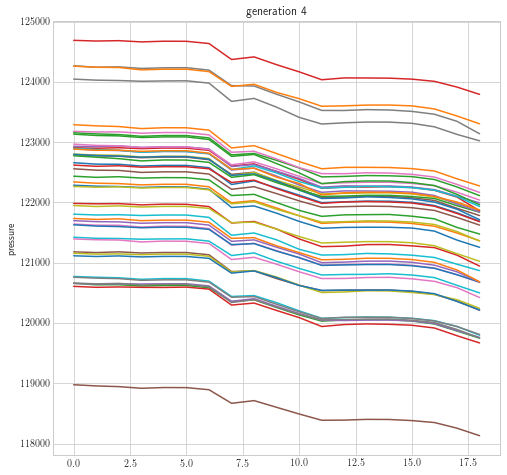

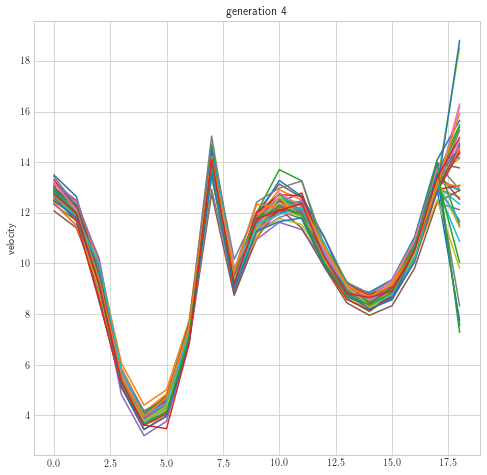

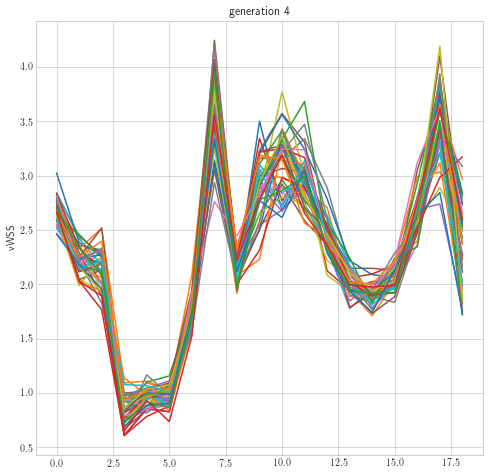

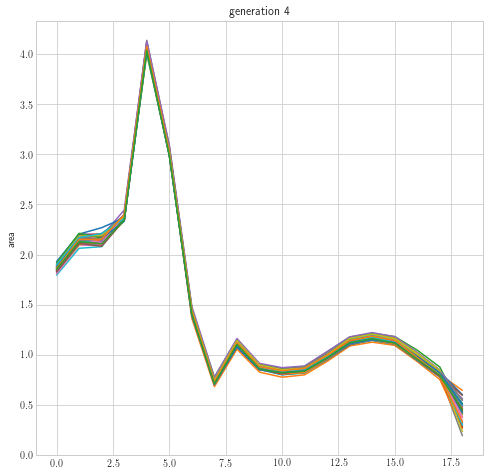

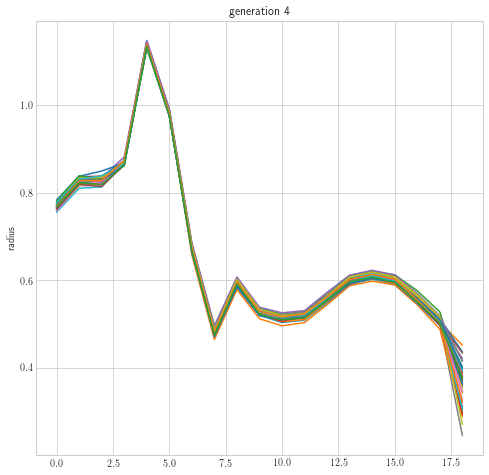

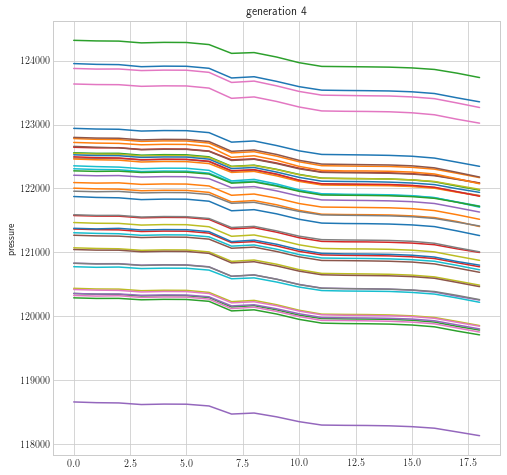

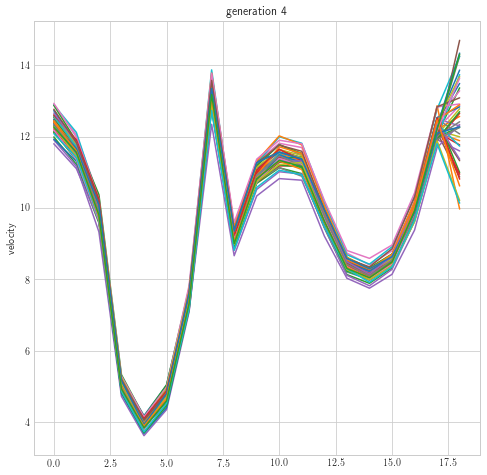

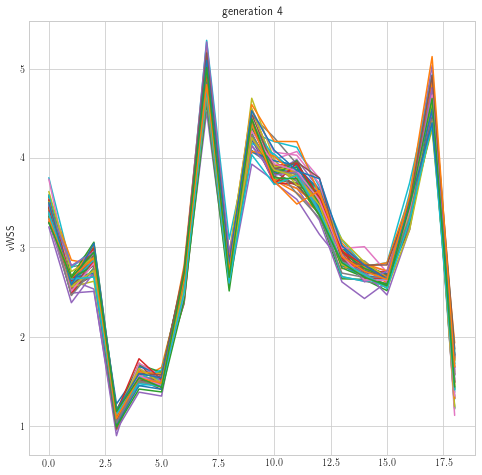

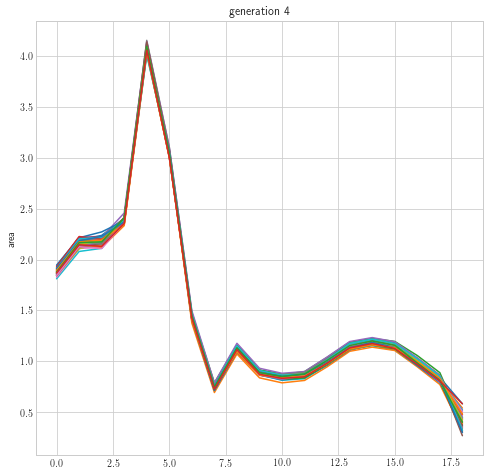

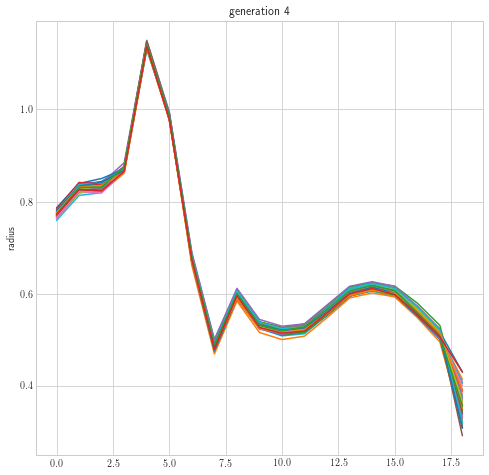

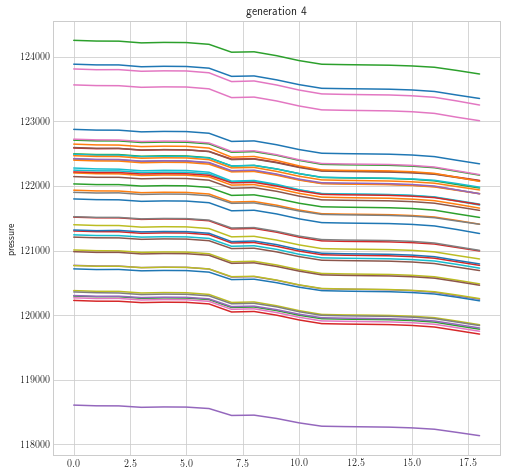

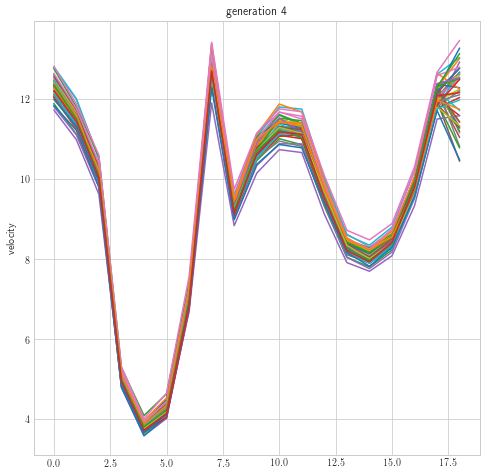

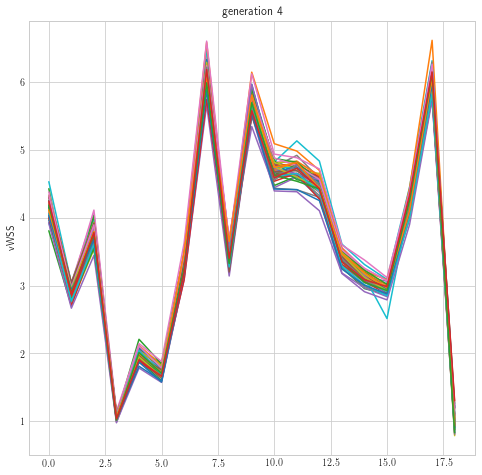

In [4]:
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        
        for q,l in zip(quants,labels):
        
            Y  = np.zeros((Nm,Nx))
            for i,mo in enumerate(models):
                y    = data.loc[data['model']==mo][q].values
                Y[i] = y
            
            fn = os.path.join(FIG_DIR,str(g),m,l+".pdf")
            plt.figure(figsize=(8,8))
            plt.title('generation ' + str(g))
            plt.plot(Y.T, label=l)
            plt.ylabel(l)
            plt.savefig(fn,dpi=300)

/home/marsdenlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


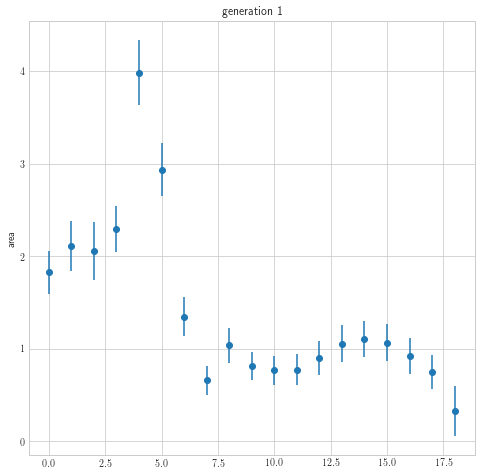

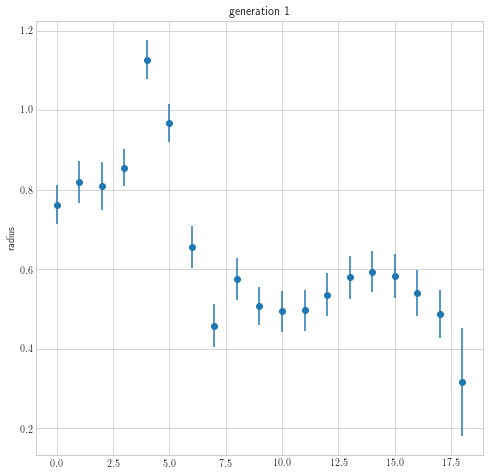

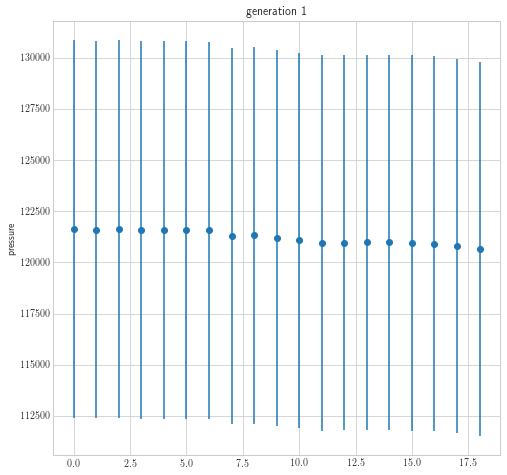

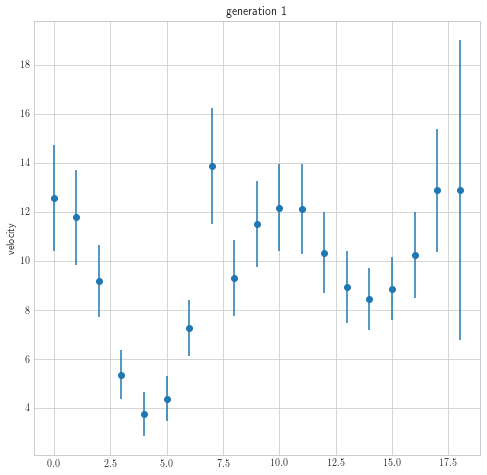

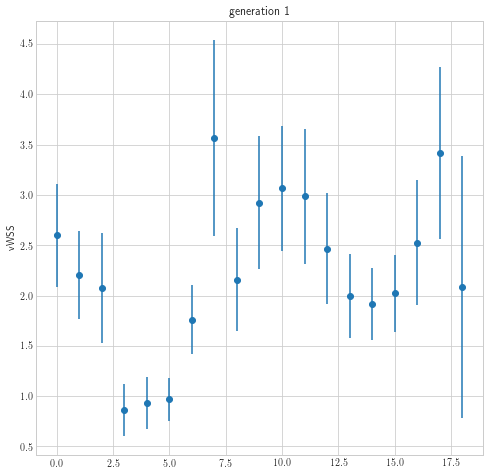

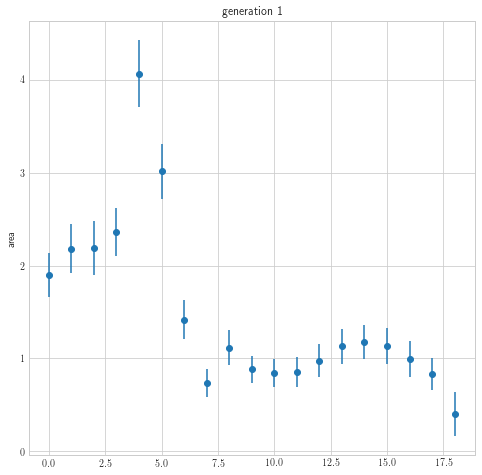

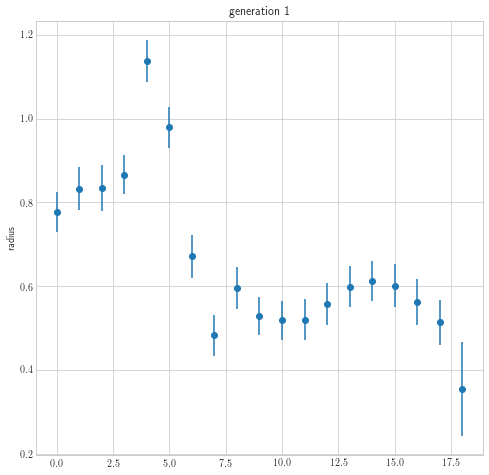

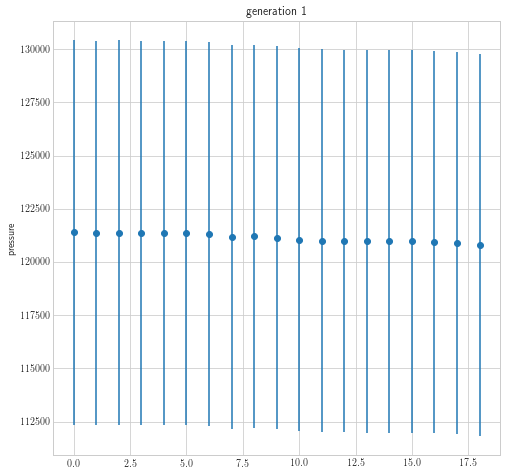

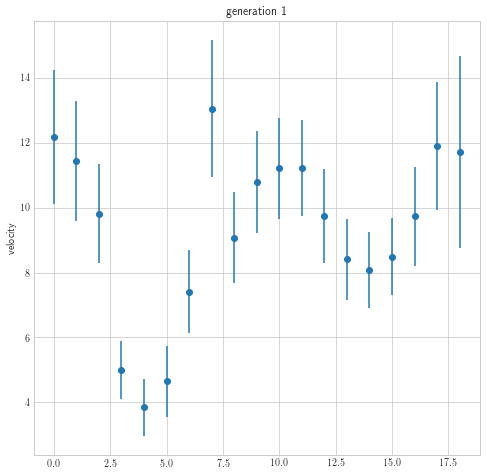

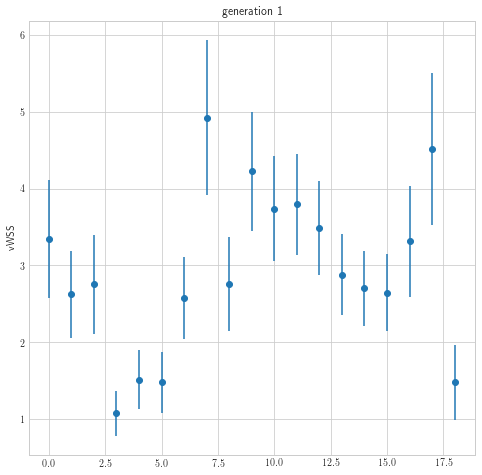

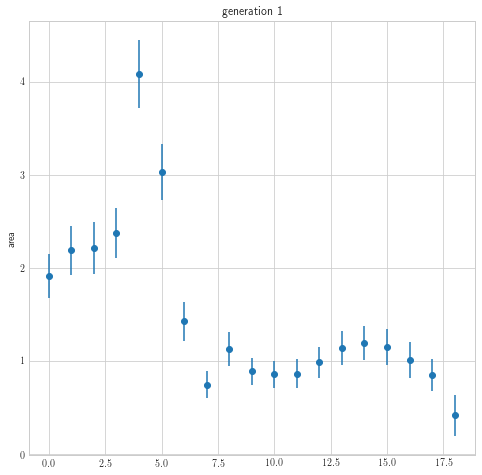

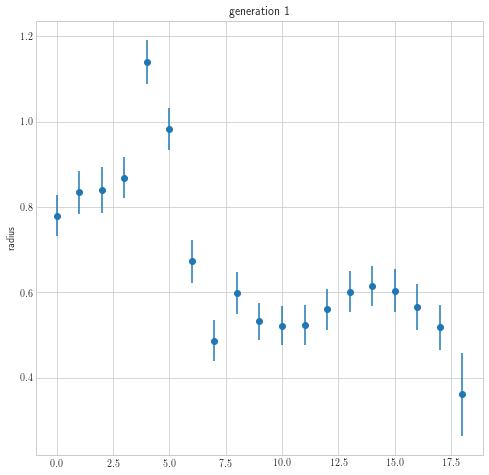

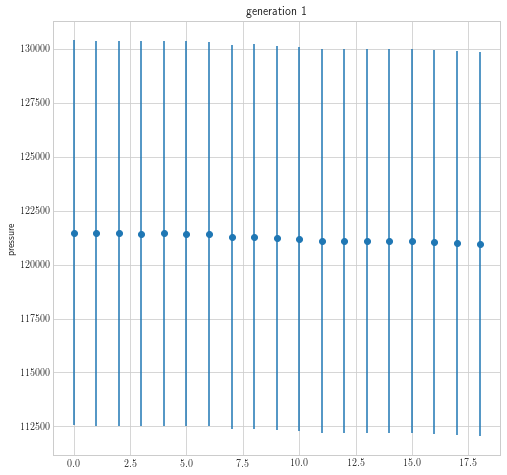

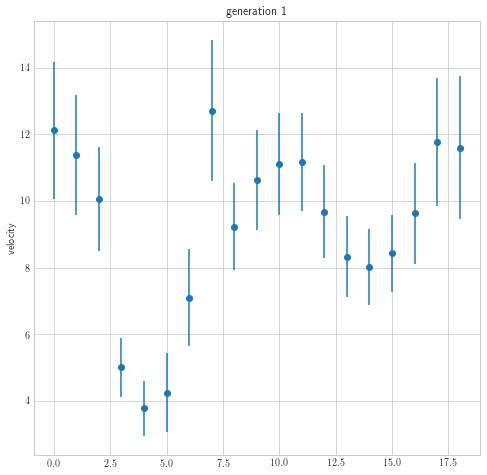

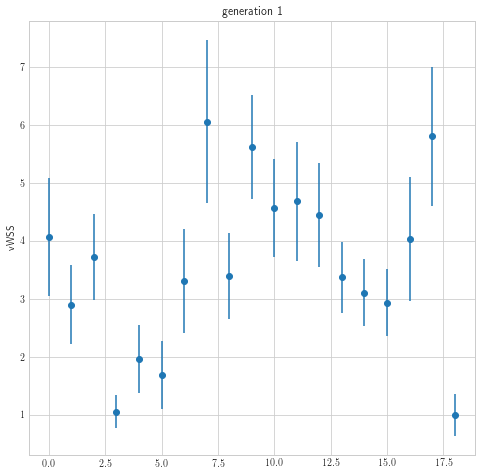

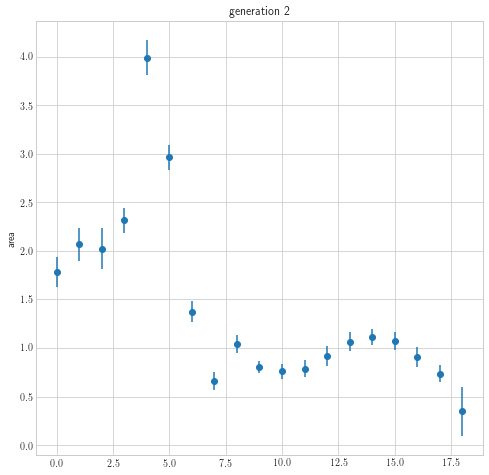

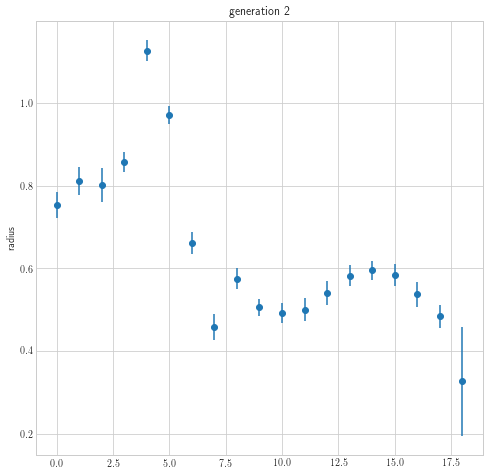

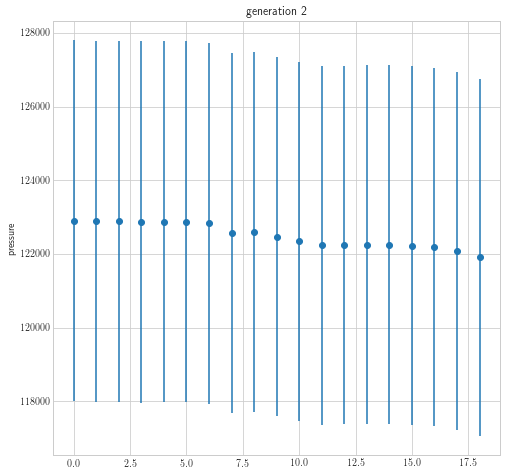

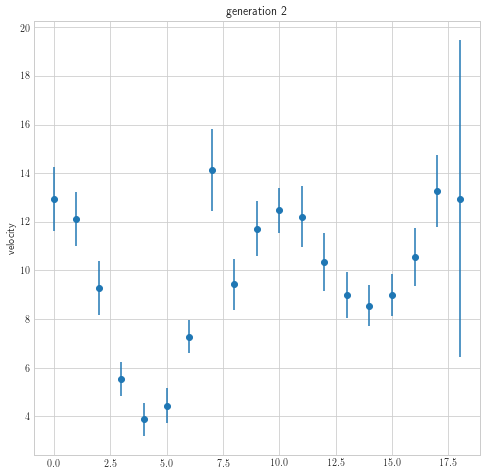

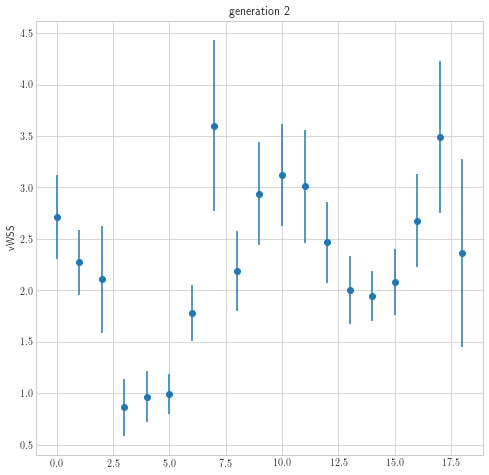

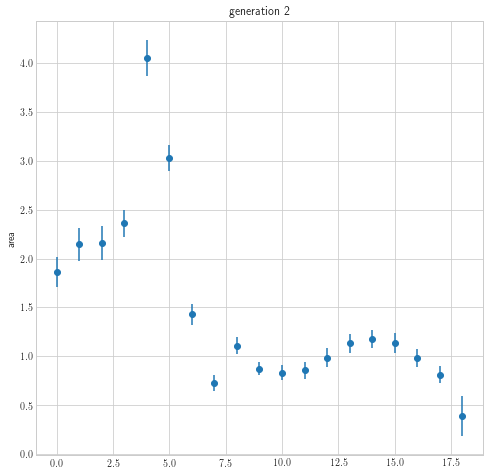

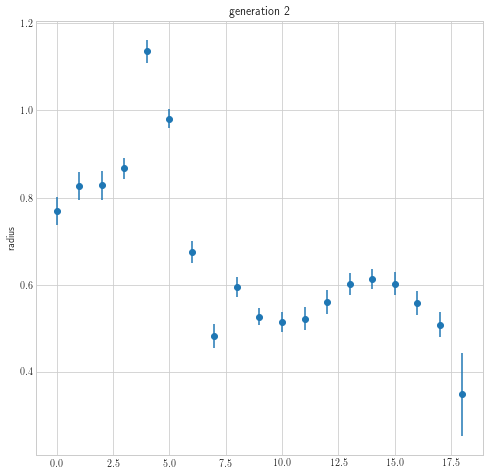

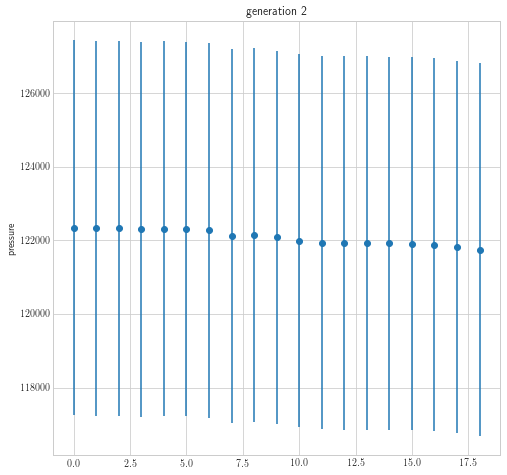

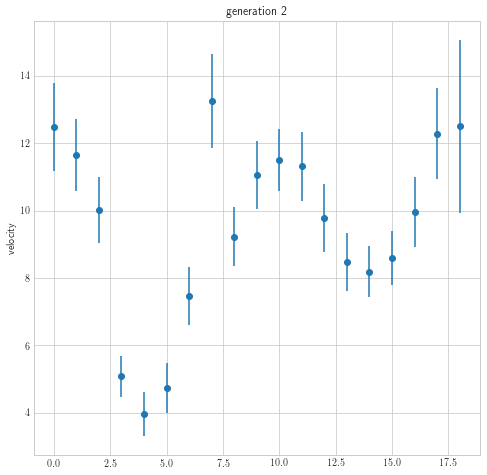

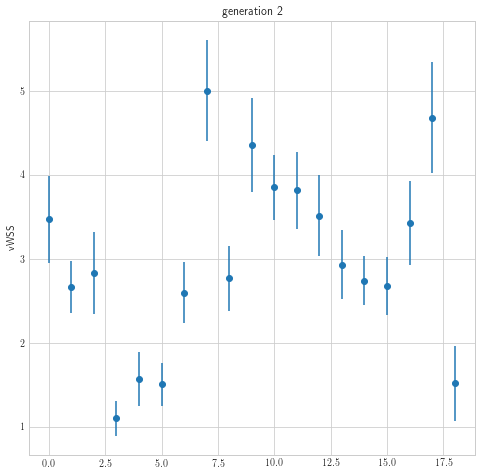

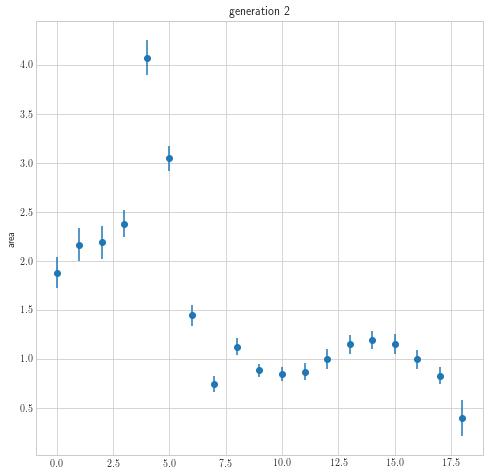

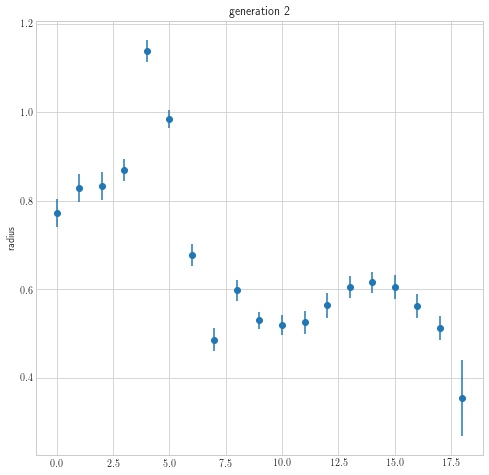

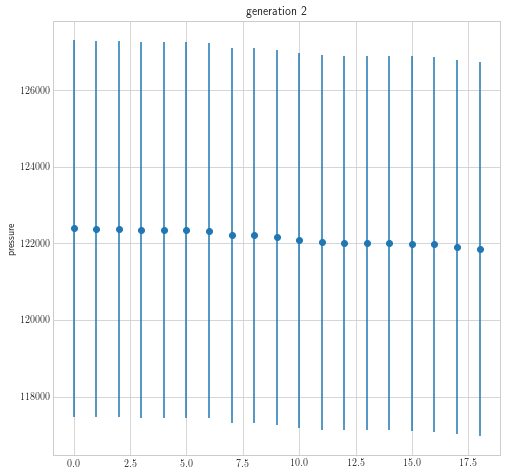

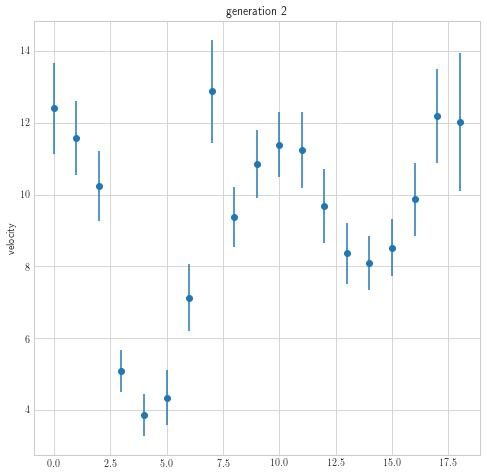

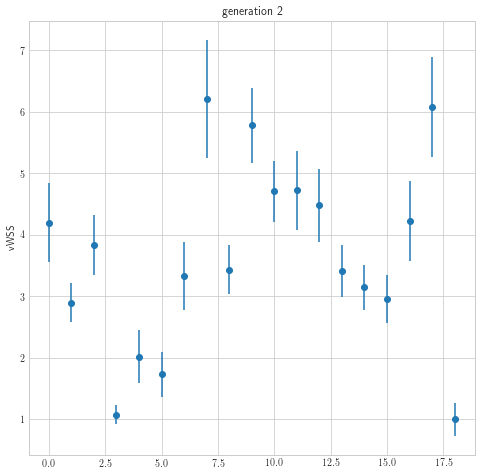

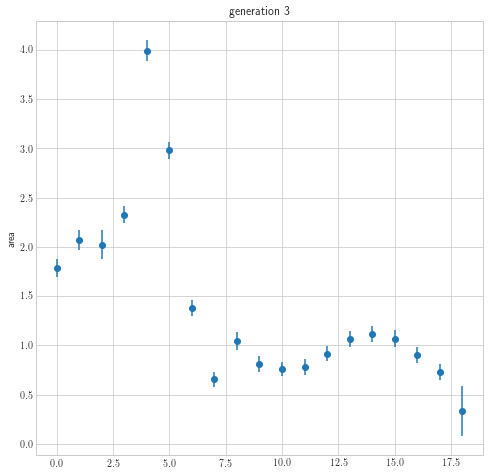

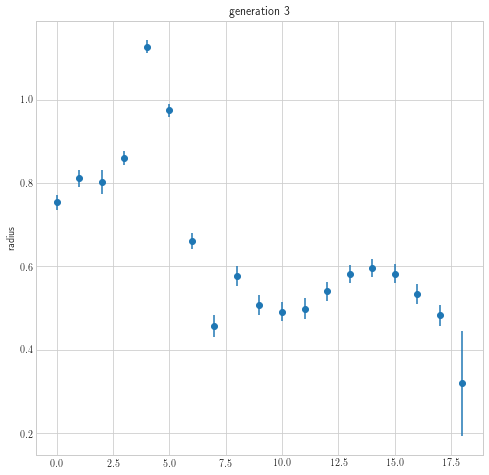

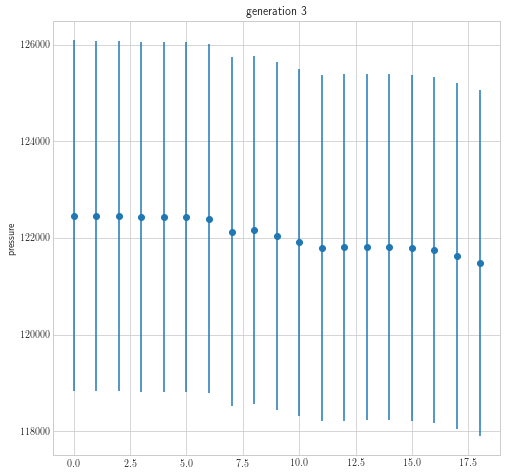

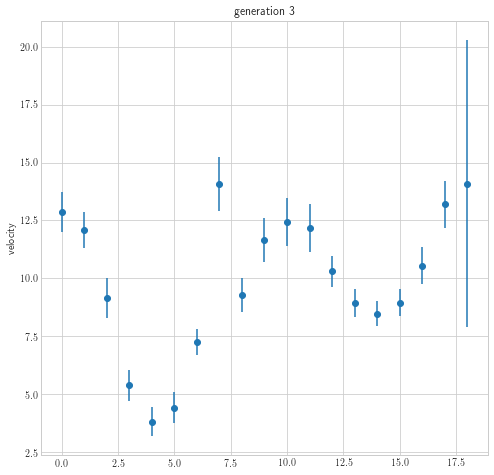

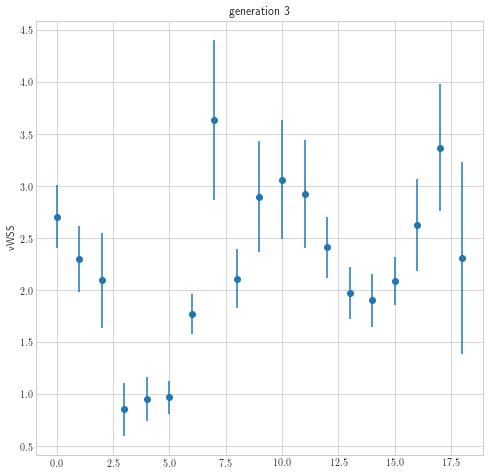

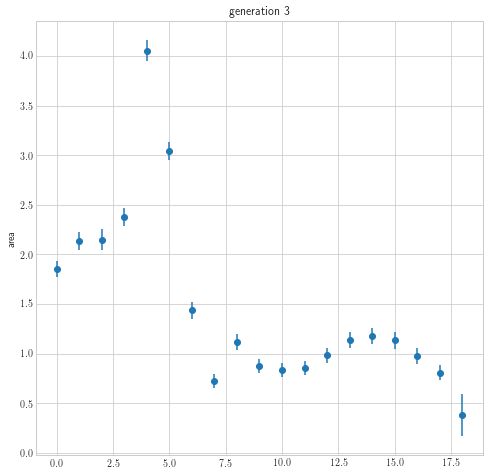

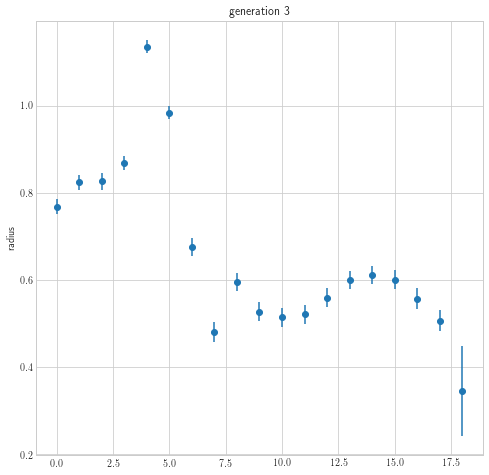

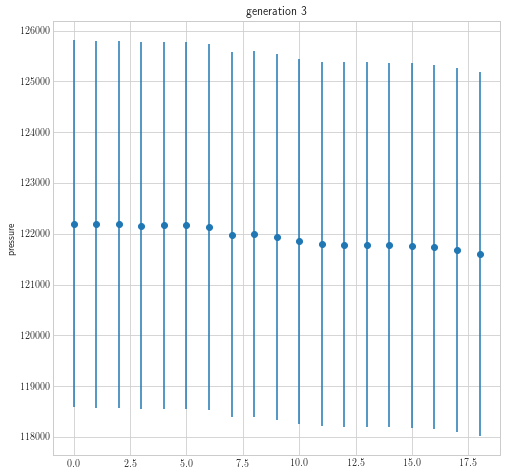

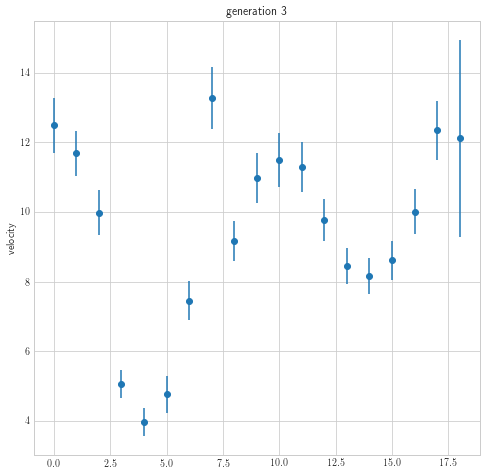

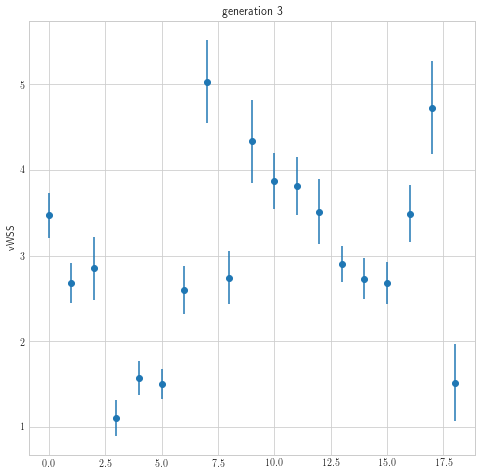

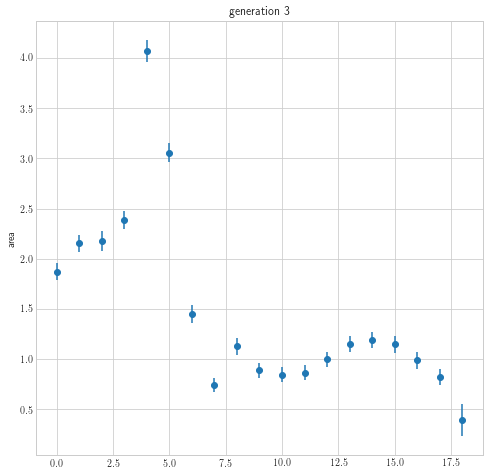

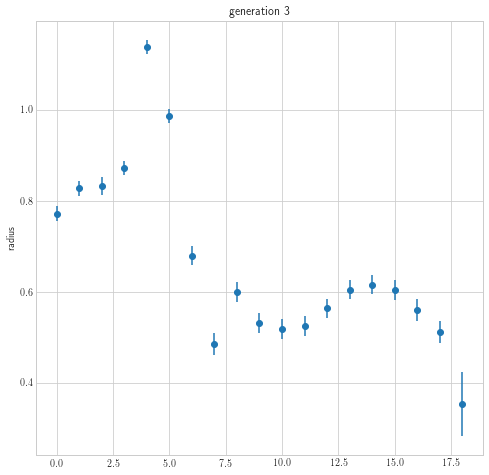

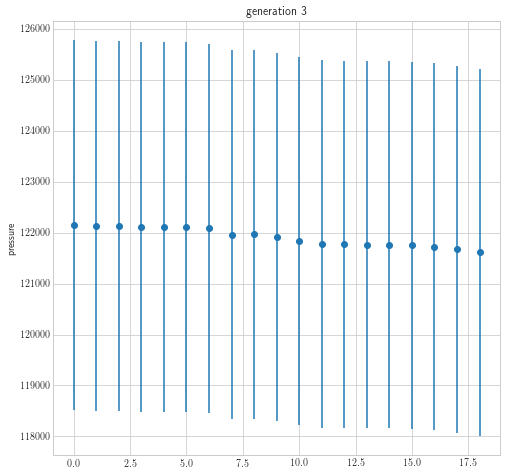

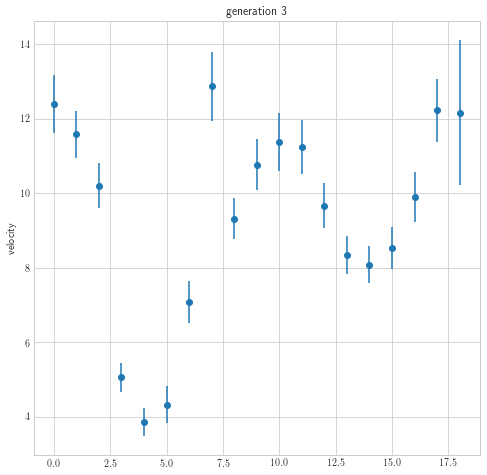

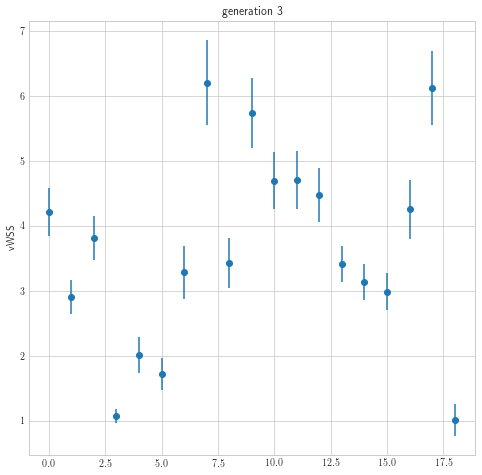

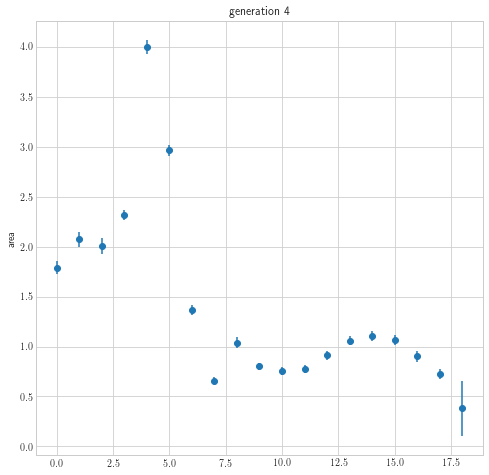

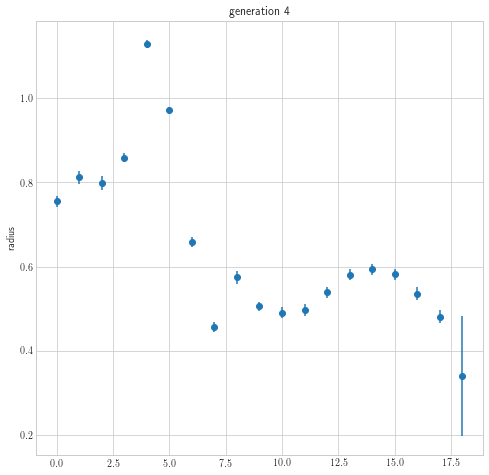

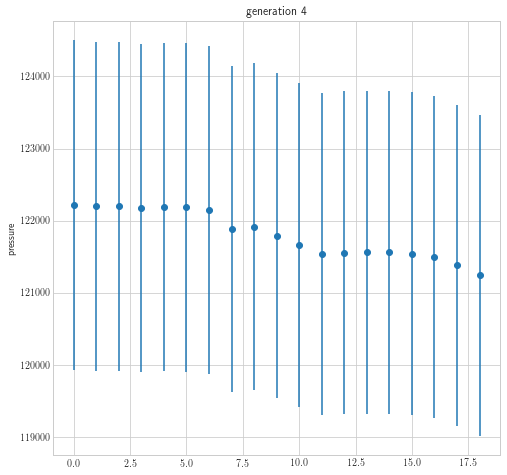

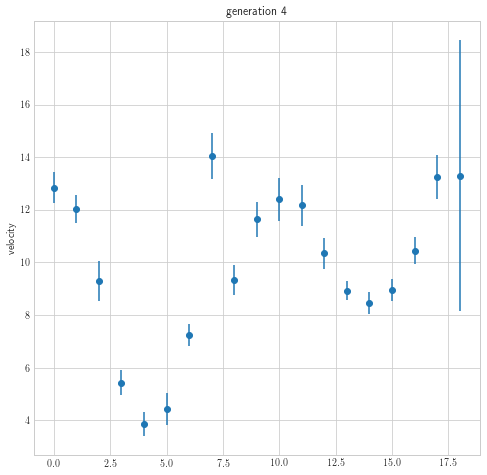

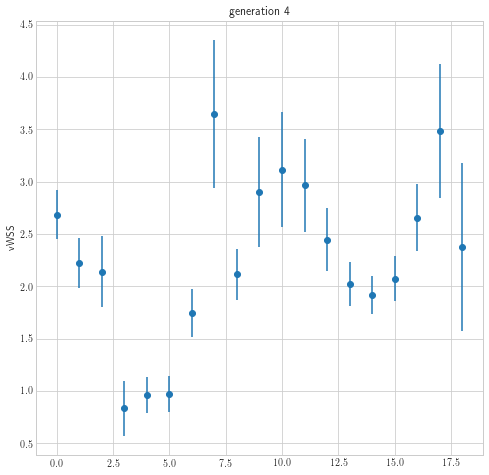

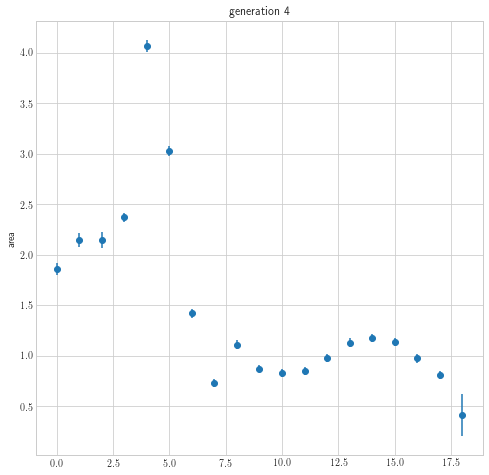

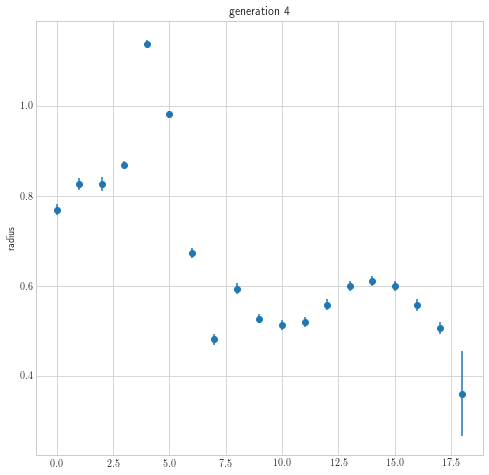

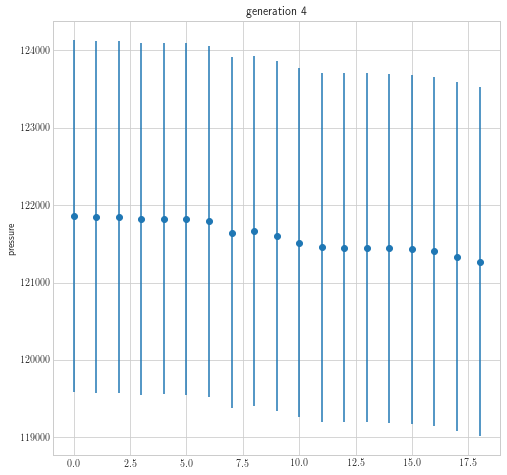

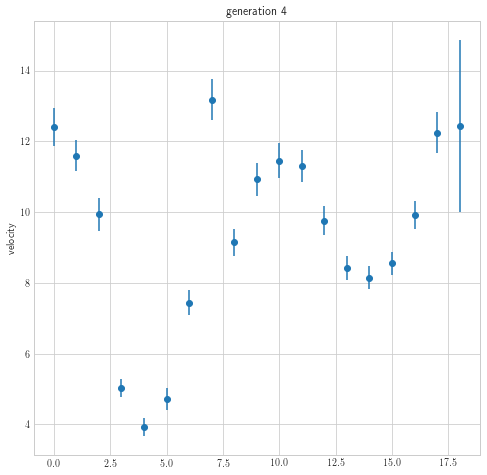

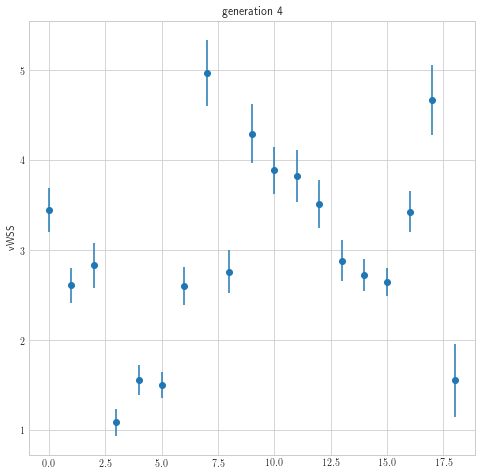

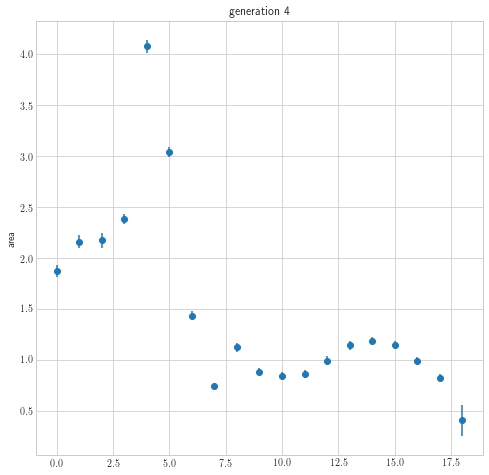

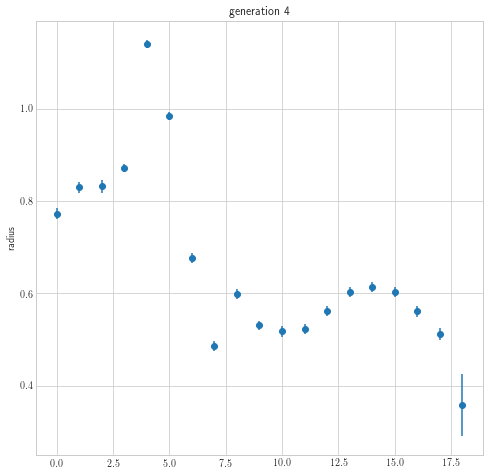

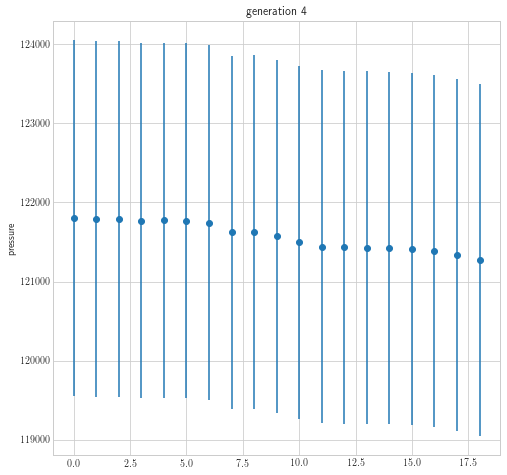

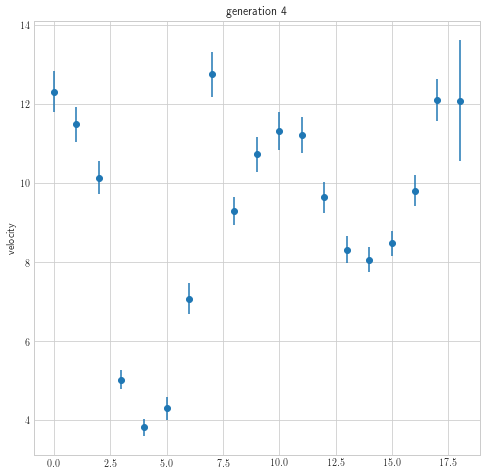

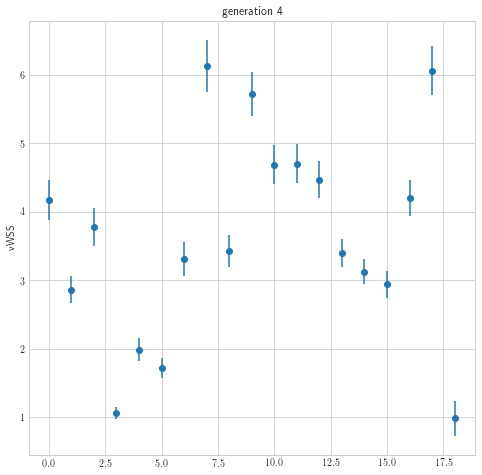

In [5]:
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        
        for q,l in zip(quants,labels):
        
            Y  = np.zeros((Nm,Nx))
            for i,mo in enumerate(models):
                y    = data.loc[data['model']==mo][q].values
                Y[i] = y
            
            fn = os.path.join(FIG_DIR,str(g),m,l+"_std.pdf")

            mu  = np.mean(Y,axis=0) 
            sig = np.std(Y,axis=0)*2

            plt.figure(figsize=(8,8))
            plt.title('generation ' + str(g))
            plt.errorbar(x,y=mu, yerr=sig, fmt='o')
            plt.ylabel(l)
            plt.savefig(fn,dpi=300)

/home/marsdenlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


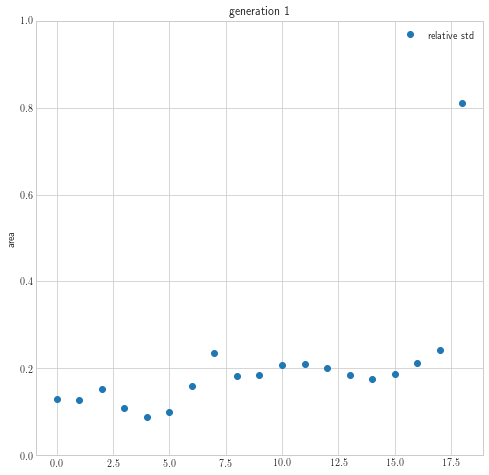

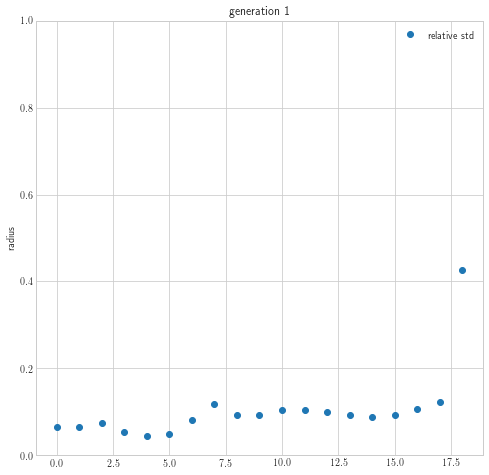

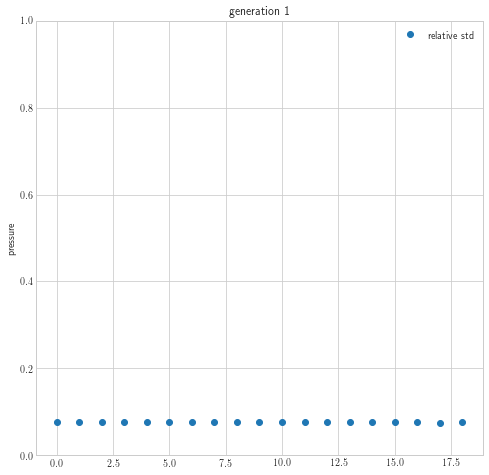

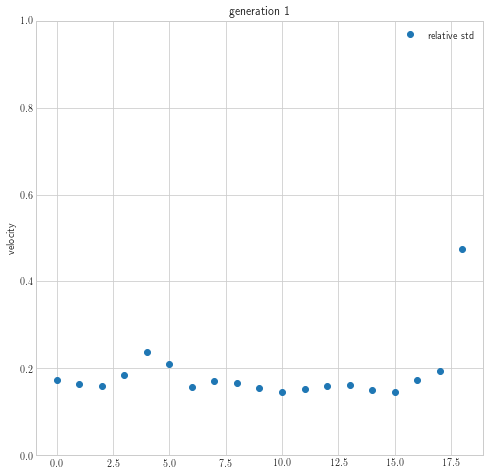

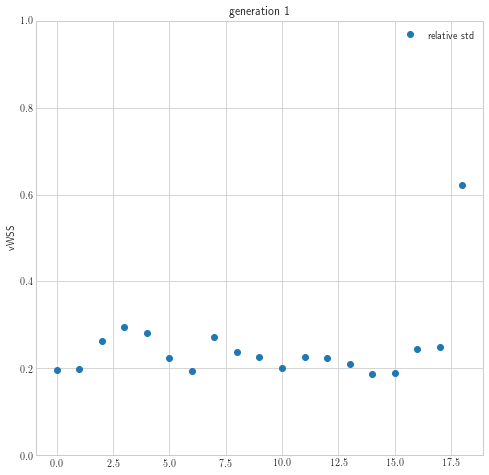

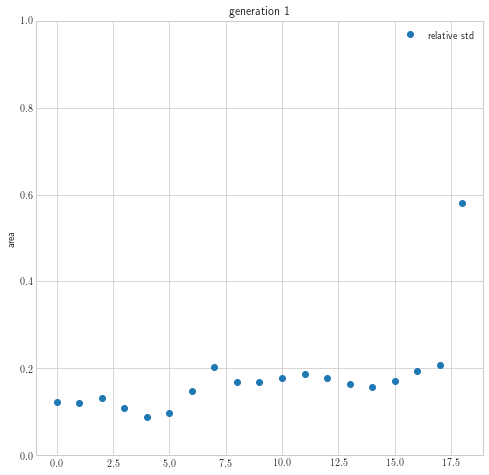

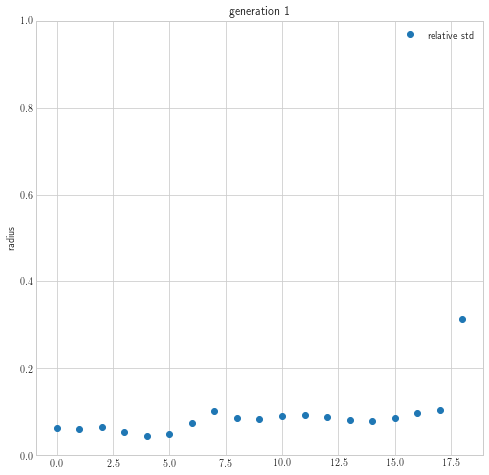

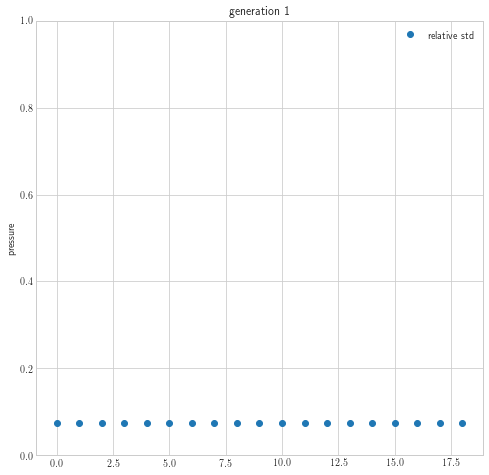

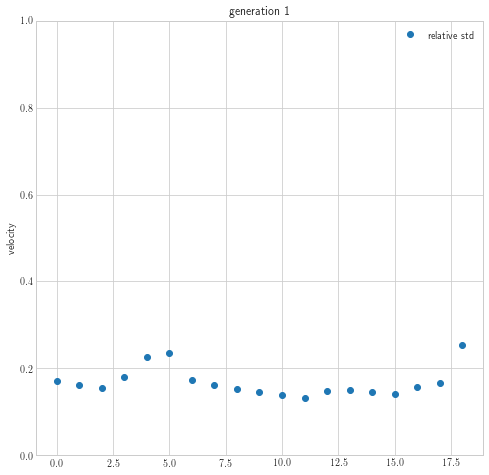

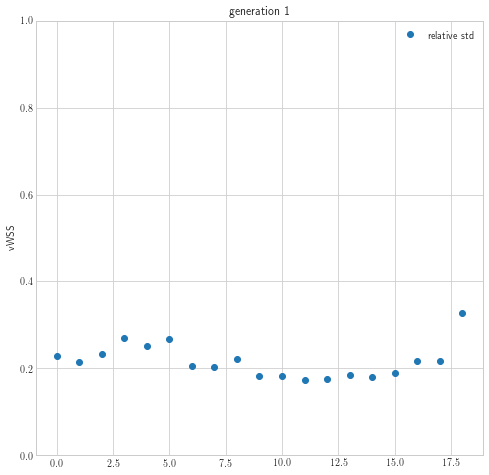

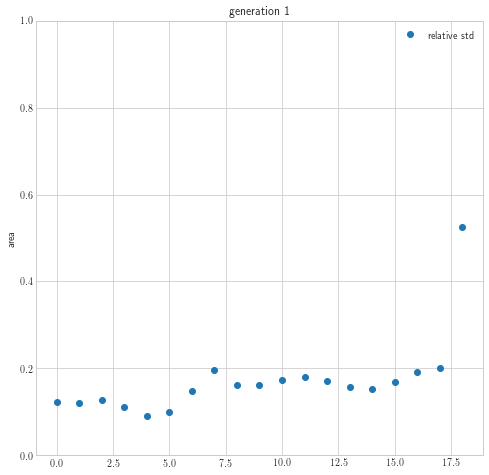

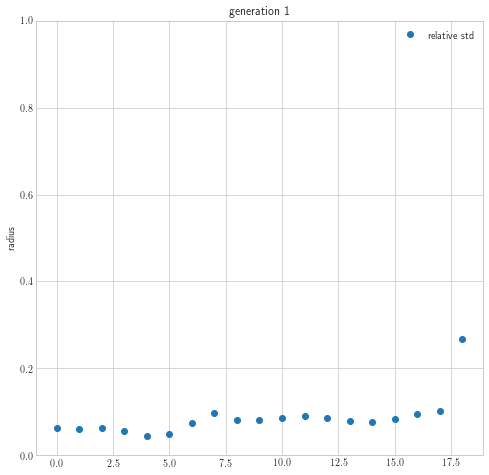

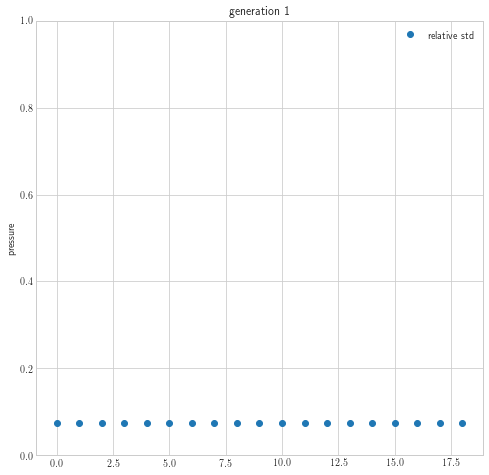

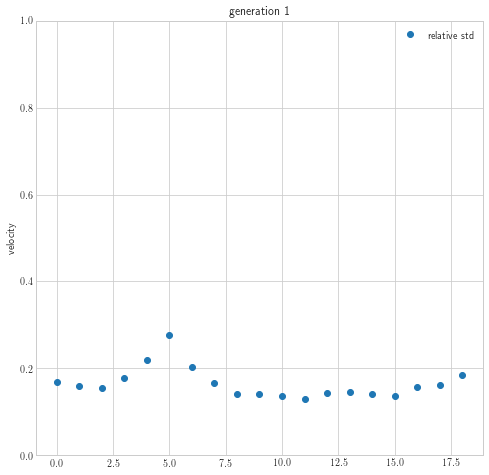

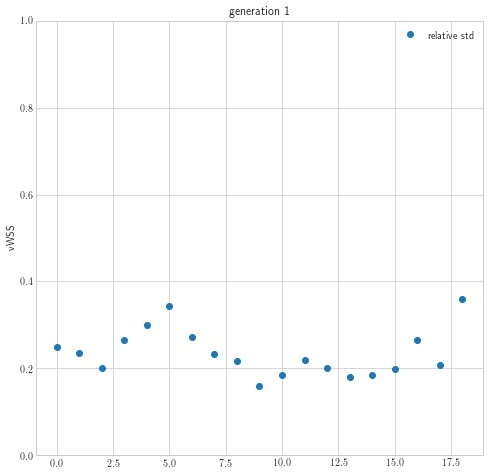

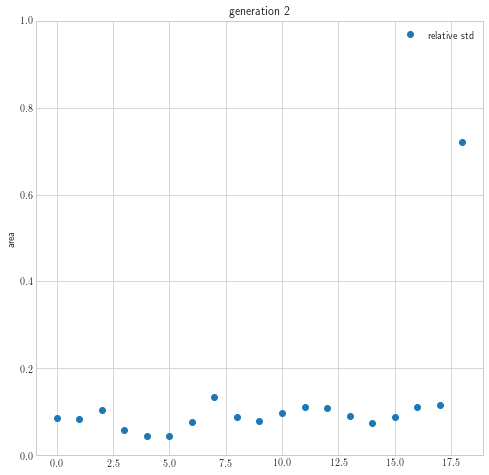

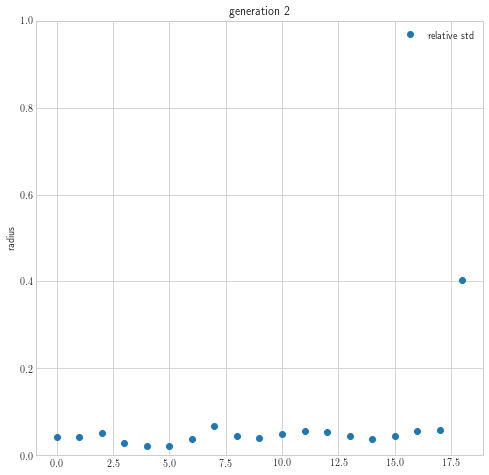

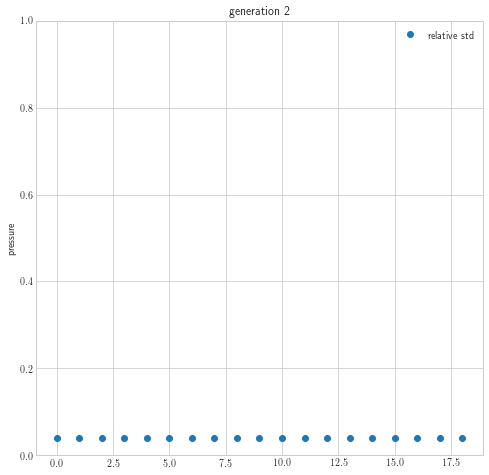

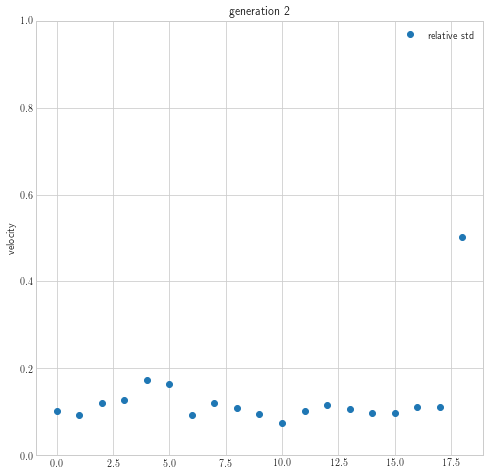

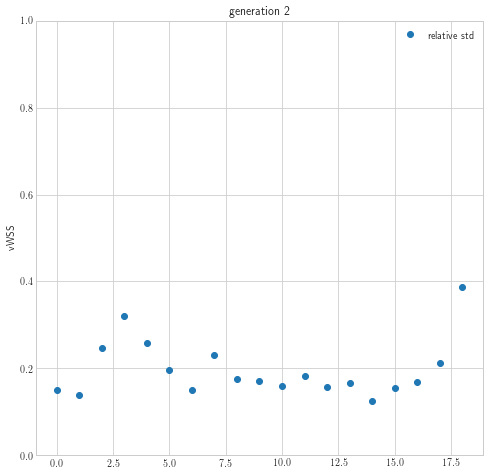

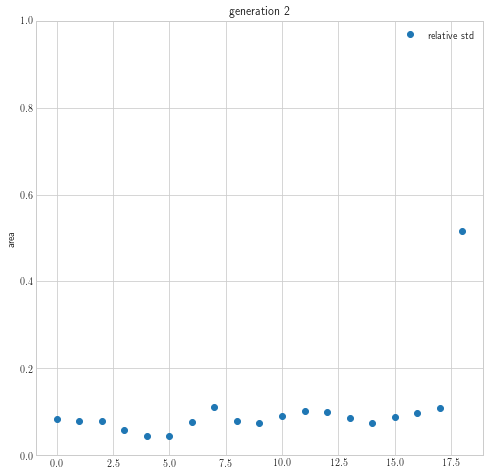

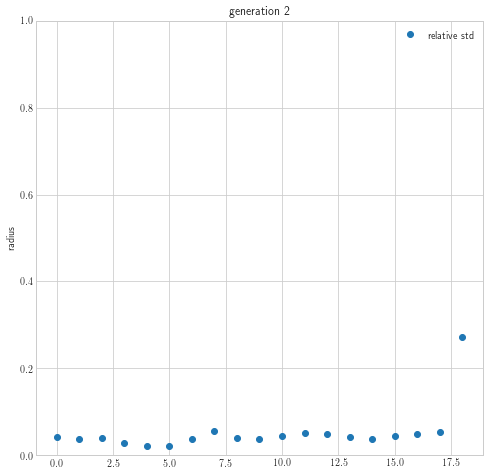

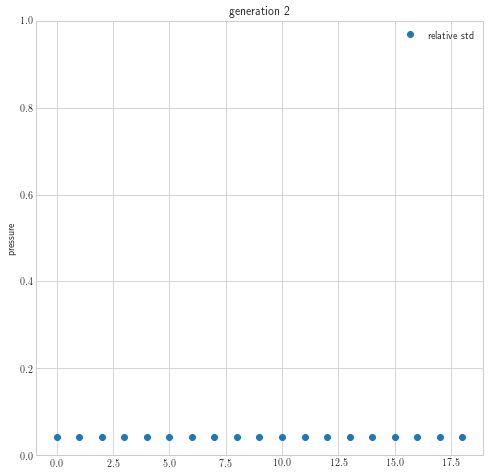

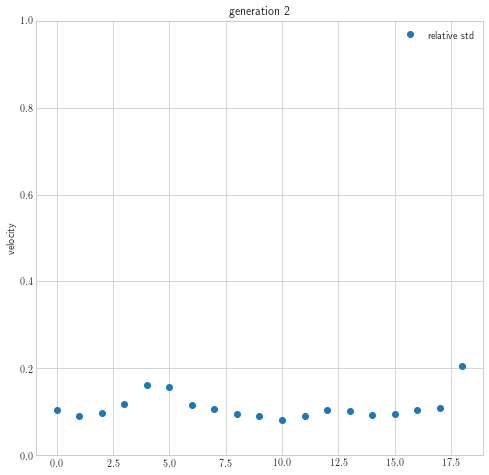

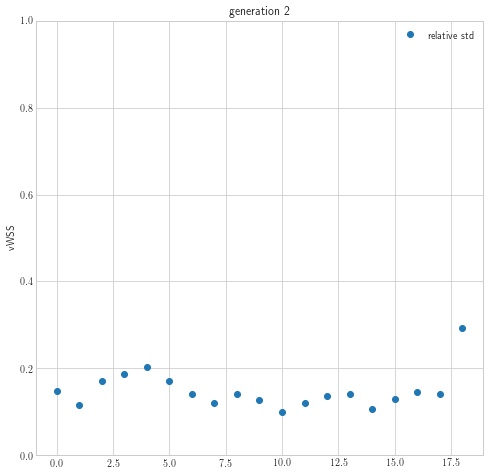

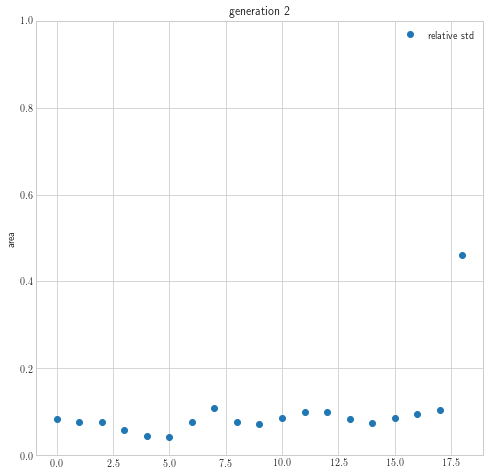

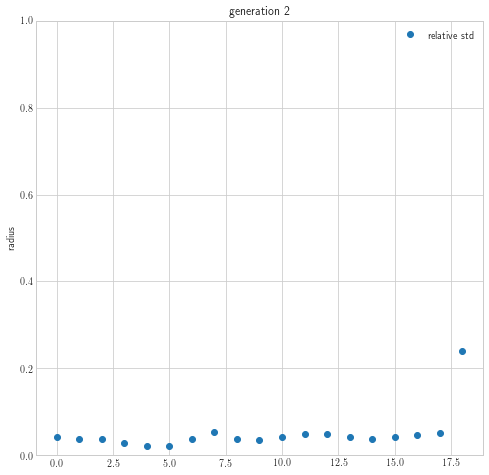

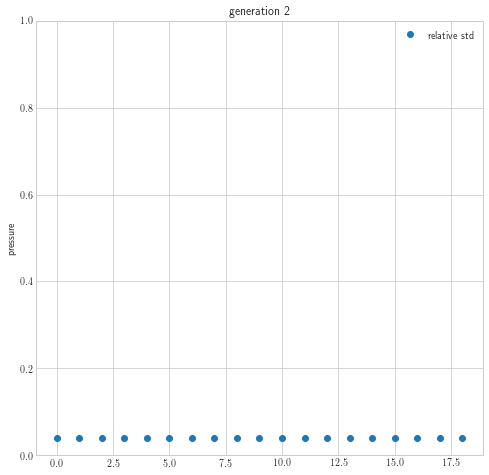

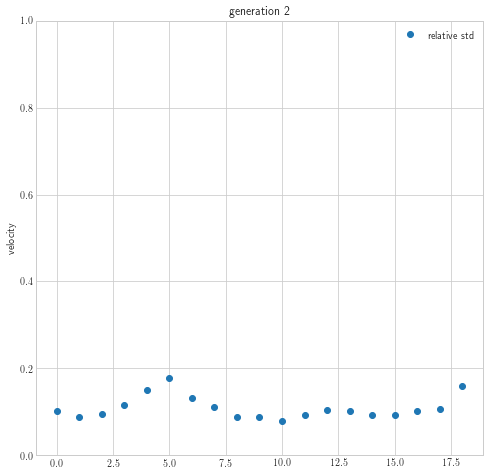

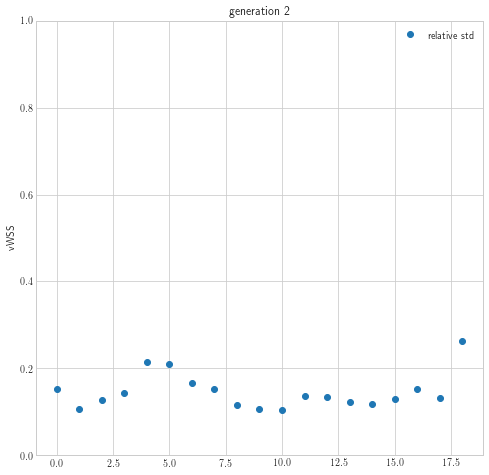

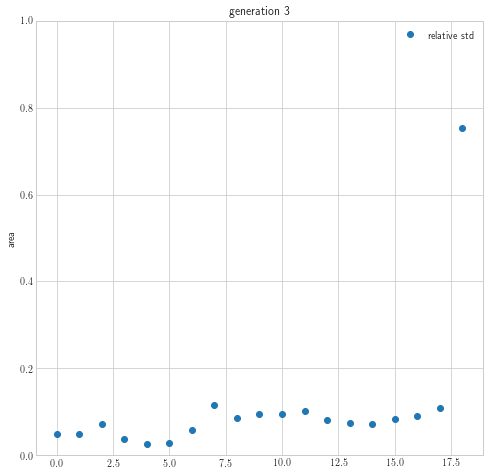

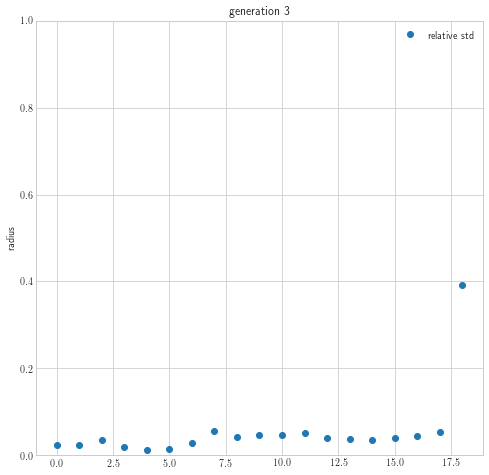

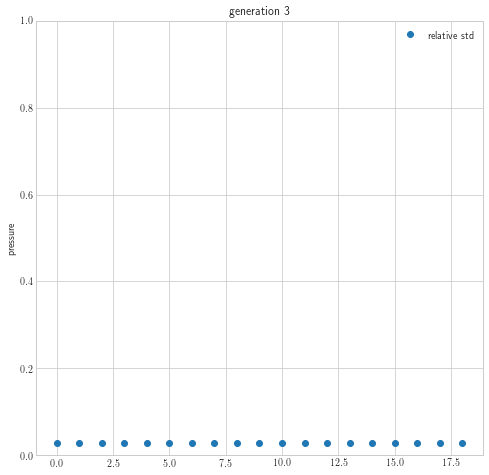

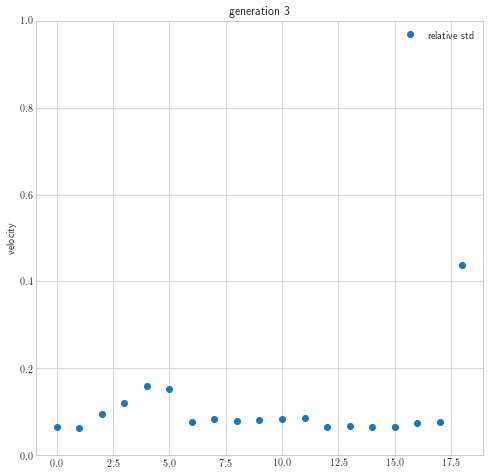

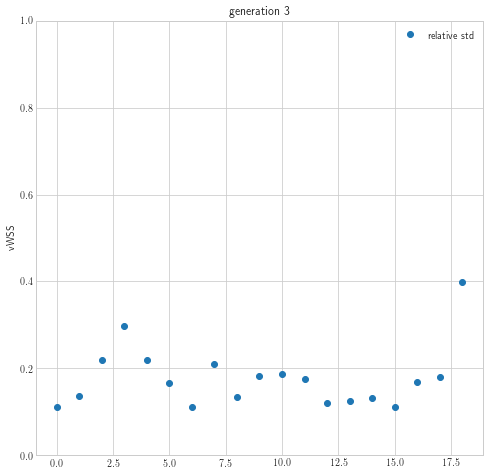

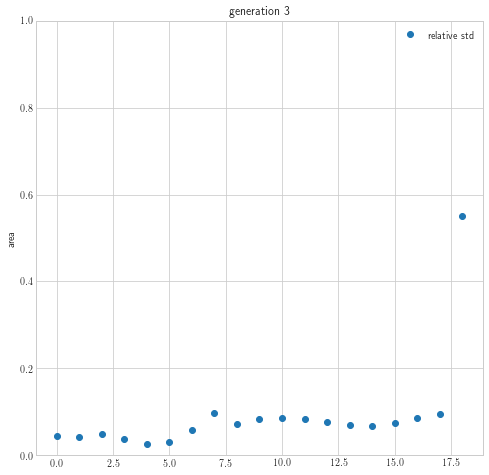

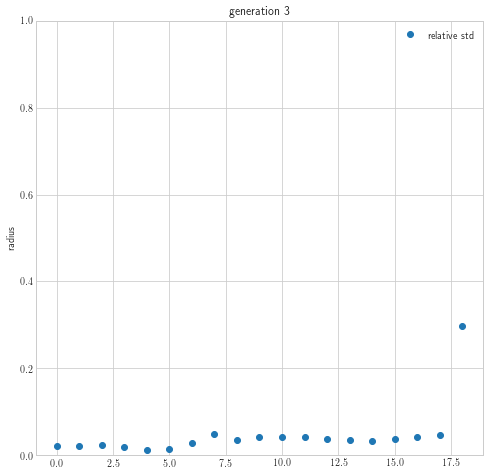

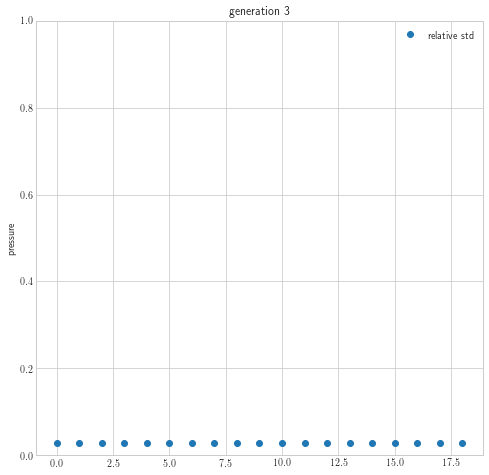

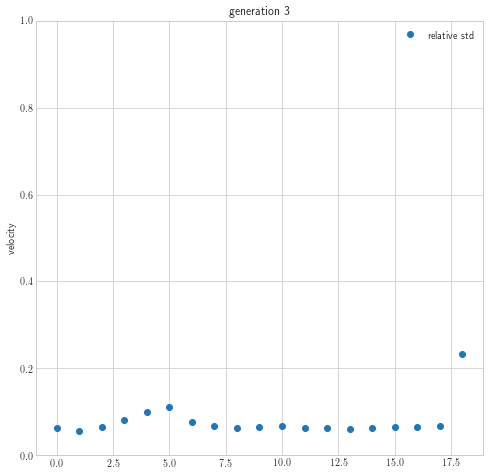

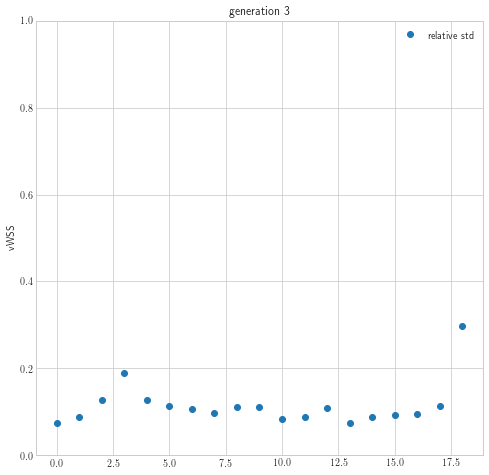

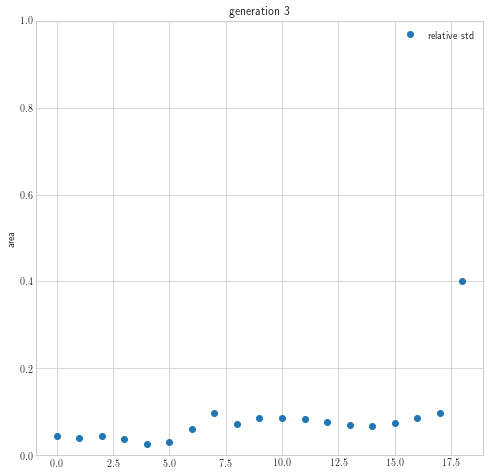

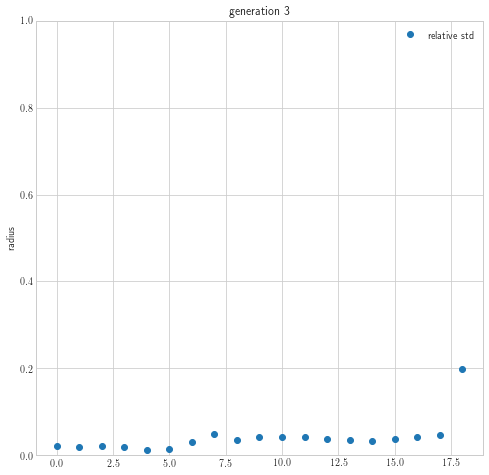

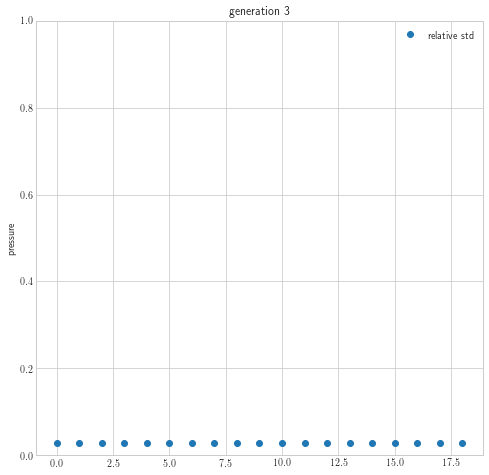

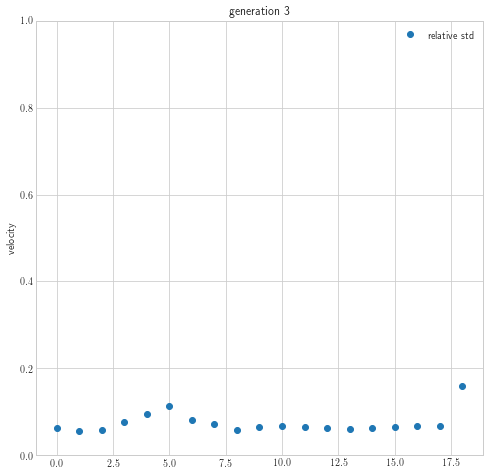

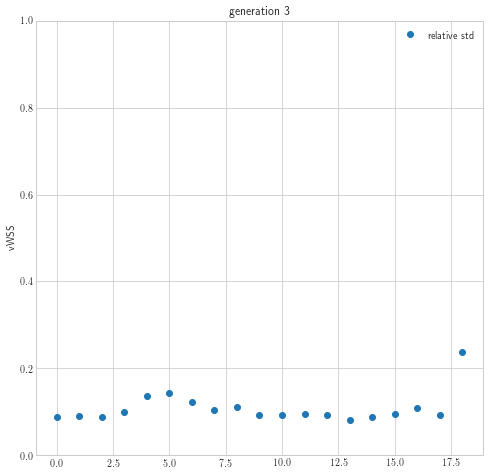

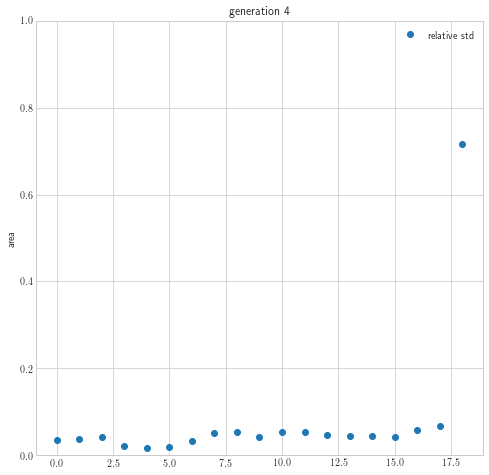

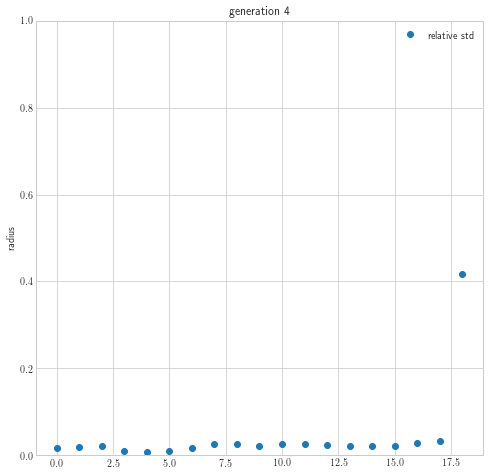

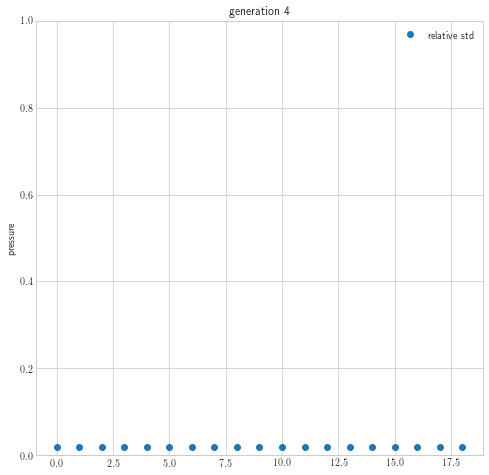

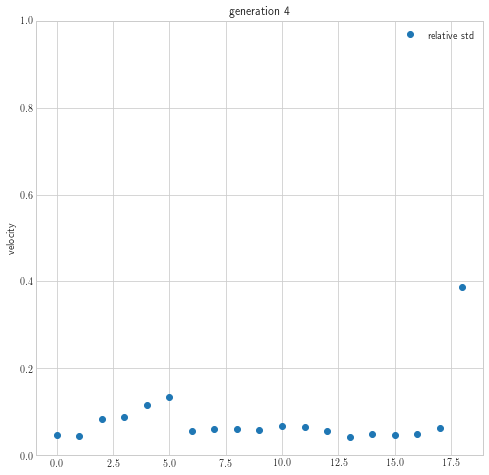

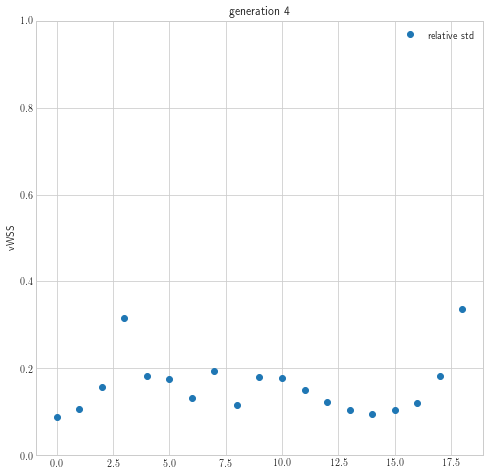

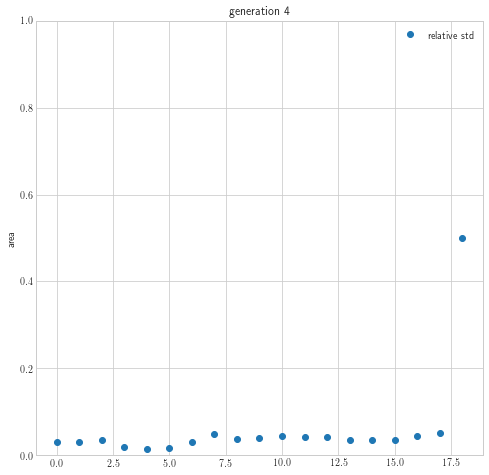

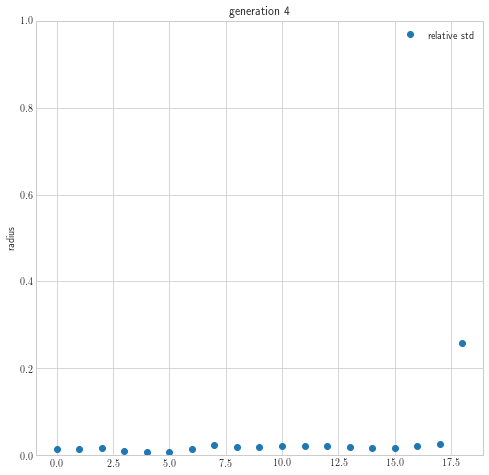

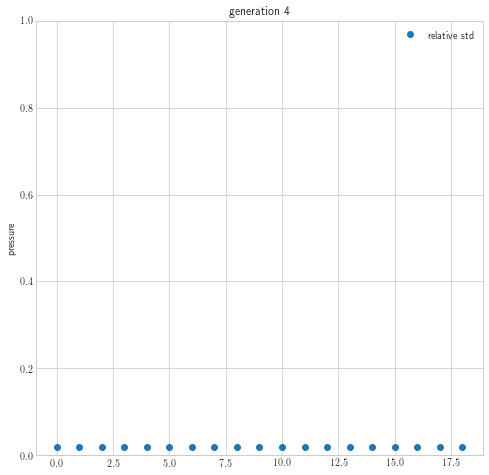

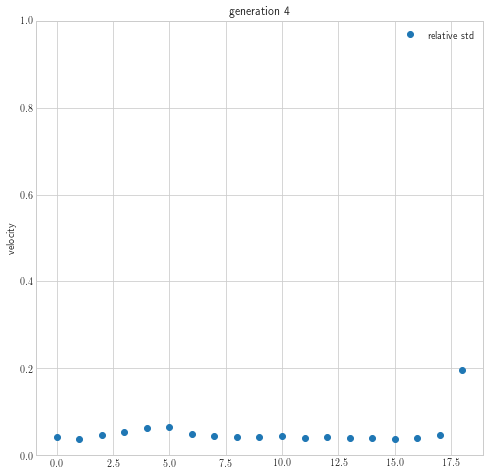

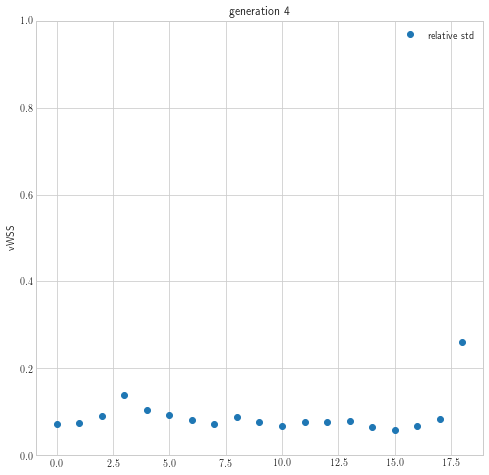

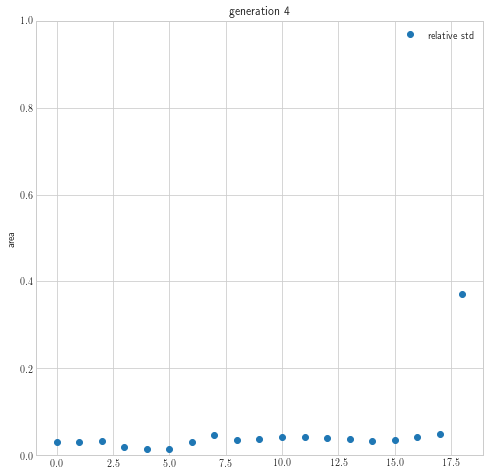

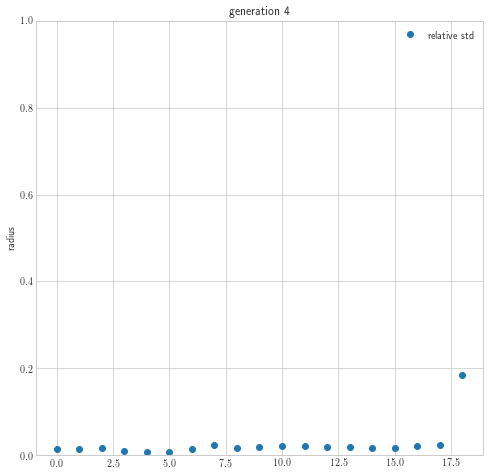

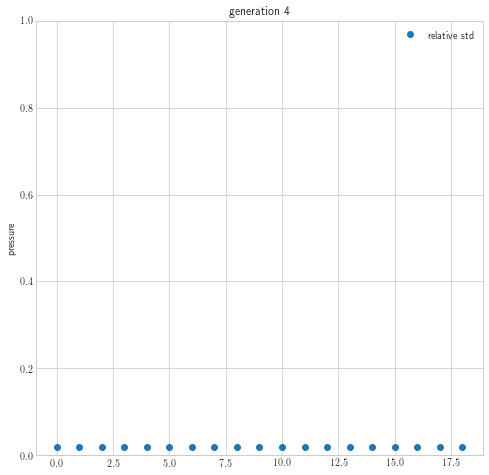

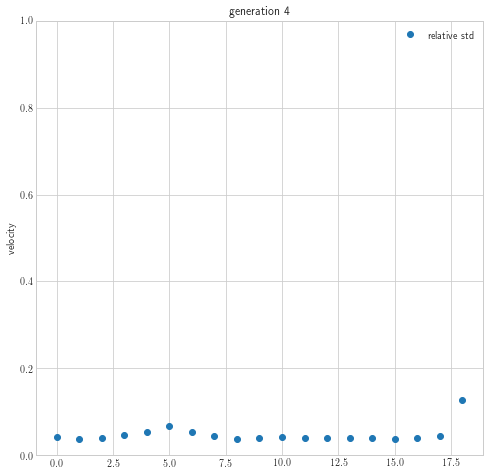

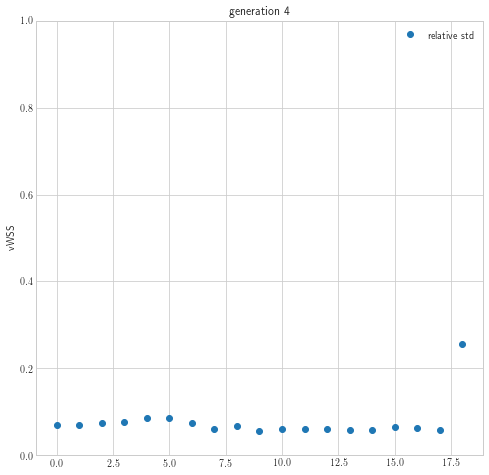

In [6]:
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        
        for q,l in zip(quants,labels):
        
            Y  = np.zeros((Nm,Nx))
            for i,mo in enumerate(models):
                y    = data.loc[data['model']==mo][q].values
                Y[i] = y
            
            fn = os.path.join(FIG_DIR,str(g),m,l+"_std_rel.pdf")

            mu  = np.mean(Y,axis=0) 
            sig = np.std(Y,axis=0)*2
            
            s = sig/np.abs(mu)
            plt.figure(figsize=(8,8))
            plt.title('generation ' + str(g))
            plt.plot(s, linestyle='',marker='o', label='relative std')
            plt.ylabel(l)
            plt.legend()
            plt.ylim(0,1)
            plt.savefig(fn,dpi=300)